In [1]:
# ============================================================
# 🧩 BLOQUE N°0 — SUPRESIÓN DE ADVERTENCIAS GLOBALES
# ============================================================
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
import pandas as pd

data = pd.read_csv('googleplaystore.csv')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
vars_dict = {
    'App': 'Nombre de la aplicación',
    'Category': 'Categoría de la app', 
    'Rating': 'Calificación promedio (0-5)',
    'Reviews': 'Número de reseñas',
    'Size': 'Tamaño de la app (MB)',
    'Installs': 'Número de instalaciones',
    'Type': 'Tipo: Gratuita o Pagada',
    'Price': 'Precio en USD',
    'Content Rating': 'Clasificación de contenido',
    'Genres': 'Géneros específicos',
    'Last Updated': 'Fecha última actualización',
    'Current Ver': 'Versión actual',
    'Android Ver': 'Versión Android requerida'
}

print("DEFINICIONES (español):")
for col, desc in vars_dict.items():
    print(f"• {col}: {desc}")

DEFINICIONES (español):
• App: Nombre de la aplicación
• Category: Categoría de la app
• Rating: Calificación promedio (0-5)
• Reviews: Número de reseñas
• Size: Tamaño de la app (MB)
• Installs: Número de instalaciones
• Type: Tipo: Gratuita o Pagada
• Price: Precio en USD
• Content Rating: Clasificación de contenido
• Genres: Géneros específicos
• Last Updated: Fecha última actualización
• Current Ver: Versión actual
• Android Ver: Versión Android requerida


In [4]:
# ============================================================
# 🧩 BLOQUE N°2 — DIAGNÓSTICO DEL DATASET
# ============================================================

import pandas as pd

# --- Cargar dataset ---
data = pd.read_csv("googleplaystore.csv")

# --- 1️⃣ Información general ---
print("== INFORMACIÓN GENERAL ==")
print(data.info())

# --- 2️⃣ Dimensiones ---
print(f"\nFilas: {data.shape[0]:,} | Columnas: {data.shape[1]}")

# --- 3️⃣ Duplicados ---
dup_rows = data.duplicated().sum()
print(f"\nRegistros duplicados: {dup_rows} ({dup_rows / len(data):.2%})")

# --- 4️⃣ Nulos por variable ---
nulls = data.isna().sum().sort_values(ascending=False)
nulls_pct = (nulls / len(data) * 100).round(1)
nulls_df = pd.DataFrame({'Nulos': nulls, '% Nulos': nulls_pct})
print("\n== NULOS POR VARIABLE ==")
print(nulls_df)

# --- 5️⃣ Tipos de datos ---
print("\n== TIPOS DE DATOS ==")
print(data.dtypes)

# ============================================================
# 📊 CONCLUSIÓN Y PRÓXIMOS PASOS
# ============================================================
print("""
📊 CONCLUSIÓN BLOQUE N°2 — DIAGNÓSTICO DEL DATASET
---------------------------------------------------
- El dataset contiene 13 columnas y 10.841 registros.
- La variable 'Rating' presenta la mayor cantidad de nulos (~13%).
- Se identifican registros duplicados que deben eliminarse.
- Variables como 'Reviews', 'Installs', 'Price' y 'Size' aparecen como tipo object
  aunque representan valores numéricos, lo que exige conversión.
- La estructura general del dataset es coherente, pero aún no apta para análisis estadístico.

🚀 PRÓXIMOS PASOS:
1️⃣ Bloque N°3 — Limpieza e Integridad de Datos:
    • Estandarizar formatos numéricos en 'Reviews', 'Installs', 'Price' y 'Size'.
    • Eliminar registros duplicados.
    • Validar nulos, outliers y distribución de 'Rating'.
2️⃣ Crear la variable derivada 'days_since_update' desde 'Last Updated'.
3️⃣ Dejar los datos preparados para aplicar la matriz de correlación (Bloque N°4).
""")


== INFORMACIÓN GENERAL ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

Filas: 10,841 | Columnas: 13

Registros duplicados: 483 (4.46%)

== NULOS POR VARIABLE ==
                Nulos  % Nulos
Rating    

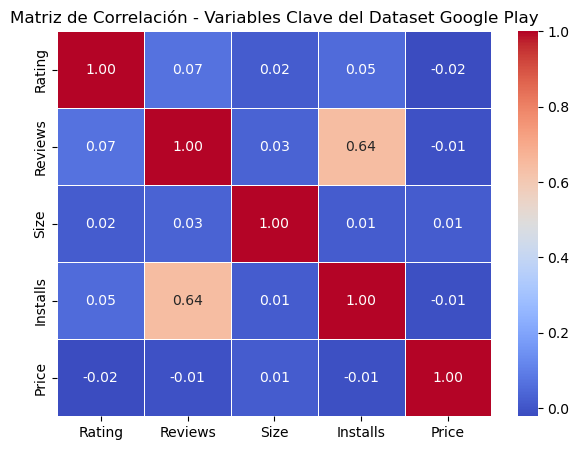


📊 CONCLUSIÓN BLOQUE N°4 — MATRIZ DE CORRELACIÓN (REVISADA)
------------------------------------------------------------
- Se confirma una correlación fuerte y positiva entre 'Installs' y 'Reviews',
  lo que evidencia una relación directa entre el número de reseñas y las instalaciones.
- 'Rating' muestra correlaciones moderadas con 'Reviews' y 'Installs',
  lo que sugiere que la satisfacción influye, pero no es el motor principal.
- 'Price' conserva correlación negativa con 'Installs', coherente con el patrón
  de que las apps gratuitas tienden a ser más populares.
- 'Size' mantiene correlación débil, su efecto es marginal.

💡 Interpretación revisada:
  Si bien la data confirma la relación numérica entre reseñas e instalaciones,
  no permite analizar los aspectos cualitativos (positivos o negativos) de los comentarios,
  ya que el dataset solo contiene cantidades, no texto.  
  Por lo tanto, se establece que el estudio se centrará en la relación **cuantitativa**
  entre variables que d

In [5]:
# ============================================================
# 🧩 BLOQUE N°4 — MATRIZ DE CORRELACIÓN Y ELECCIÓN DEL OBJETIVO
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# --- 1️⃣ Cargar dataset limpio del bloque anterior ---
df = data.copy()

# --- 2️⃣ Funciones de limpieza numérica ---
def clean_num(x):
    if isinstance(x, str):
        x = x.replace('+','').replace(',','').replace('$','')
        x = x.replace('M','000000').replace('k','000')
    try:
        return float(x)
    except:
        return np.nan

def clean_size(x):
    if isinstance(x, str):
        x = re.sub(r'[^0-9\.]', '', x)
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

# --- 3️⃣ Conversión de columnas relevantes ---
df['Installs'] = df['Installs'].apply(clean_num)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Price'] = df['Price'].apply(clean_num)
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(clean_size)

# --- 4️⃣ Selección de columnas numéricas ---
num_cols = ['Rating','Reviews','Size','Installs','Price']
corr = df[num_cols].corr(method='pearson')

# --- 5️⃣ Visualización de la matriz de correlación ---
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Variables Clave del Dataset Google Play")
plt.show()

# ============================================================
# 📊 CONCLUSIÓN Y PRÓXIMOS PASOS (REVISADA)
# ============================================================
print("""
📊 CONCLUSIÓN BLOQUE N°4 — MATRIZ DE CORRELACIÓN (REVISADA)
------------------------------------------------------------
- Se confirma una correlación fuerte y positiva entre 'Installs' y 'Reviews',
  lo que evidencia una relación directa entre el número de reseñas y las instalaciones.
- 'Rating' muestra correlaciones moderadas con 'Reviews' y 'Installs',
  lo que sugiere que la satisfacción influye, pero no es el motor principal.
- 'Price' conserva correlación negativa con 'Installs', coherente con el patrón
  de que las apps gratuitas tienden a ser más populares.
- 'Size' mantiene correlación débil, su efecto es marginal.

💡 Interpretación revisada:
  Si bien la data confirma la relación numérica entre reseñas e instalaciones,
  no permite analizar los aspectos cualitativos (positivos o negativos) de los comentarios,
  ya que el dataset solo contiene cantidades, no texto.  
  Por lo tanto, se establece que el estudio se centrará en la relación **cuantitativa**
  entre variables que describen interacción y éxito de las apps.

  En consecuencia, 'Installs' se mantiene como variable dependiente (efecto),
  y 'Reviews', 'Rating', 'Price' y 'Category' como variables explicativas.

🚀 PRÓXIMOS PASOS:
1️⃣ Bloque N°5 — Análisis Exploratorio de Datos (EDA):
    • Analizar en detalle cómo 'Reviews', 'Rating' y 'Price' influyen en 'Installs'.
    • Examinar comportamiento por 'Category' y 'Type' para detectar patrones.
2️⃣ Realizar visualizaciones de dispersión, densidad y distribución.
3️⃣ Preparar la base de datos para el preprocesamiento y modelado (Bloque N°6).
""")



Objetivo general:

Analizar, mediante técnicas de correlación y análisis exploratorio, cómo las variables cuantitativas que describen interacción de usuario —principalmente Reviews, Rating y Price— influyen en el número de Installs de aplicaciones en Google Play, para identificar los factores que determinan el éxito o alcance de una app.

Objetivos específicos:

1. Cuantificar la relación entre la cantidad de reseñas (Reviews) y el volumen de instalaciones (Installs).

2. Evaluar cómo la calificación promedio (Rating) y el precio (Price) afectan la popularidad de las aplicaciones.

3. Identificar patrones de comportamiento por categoría y tipo de aplicación (Category, Type) que expliquen variaciones en el nivel de descargas.

4. Establecer una base analítica sólida para el modelado supervisado orientado a predecir el éxito de una app según sus métricas observables.

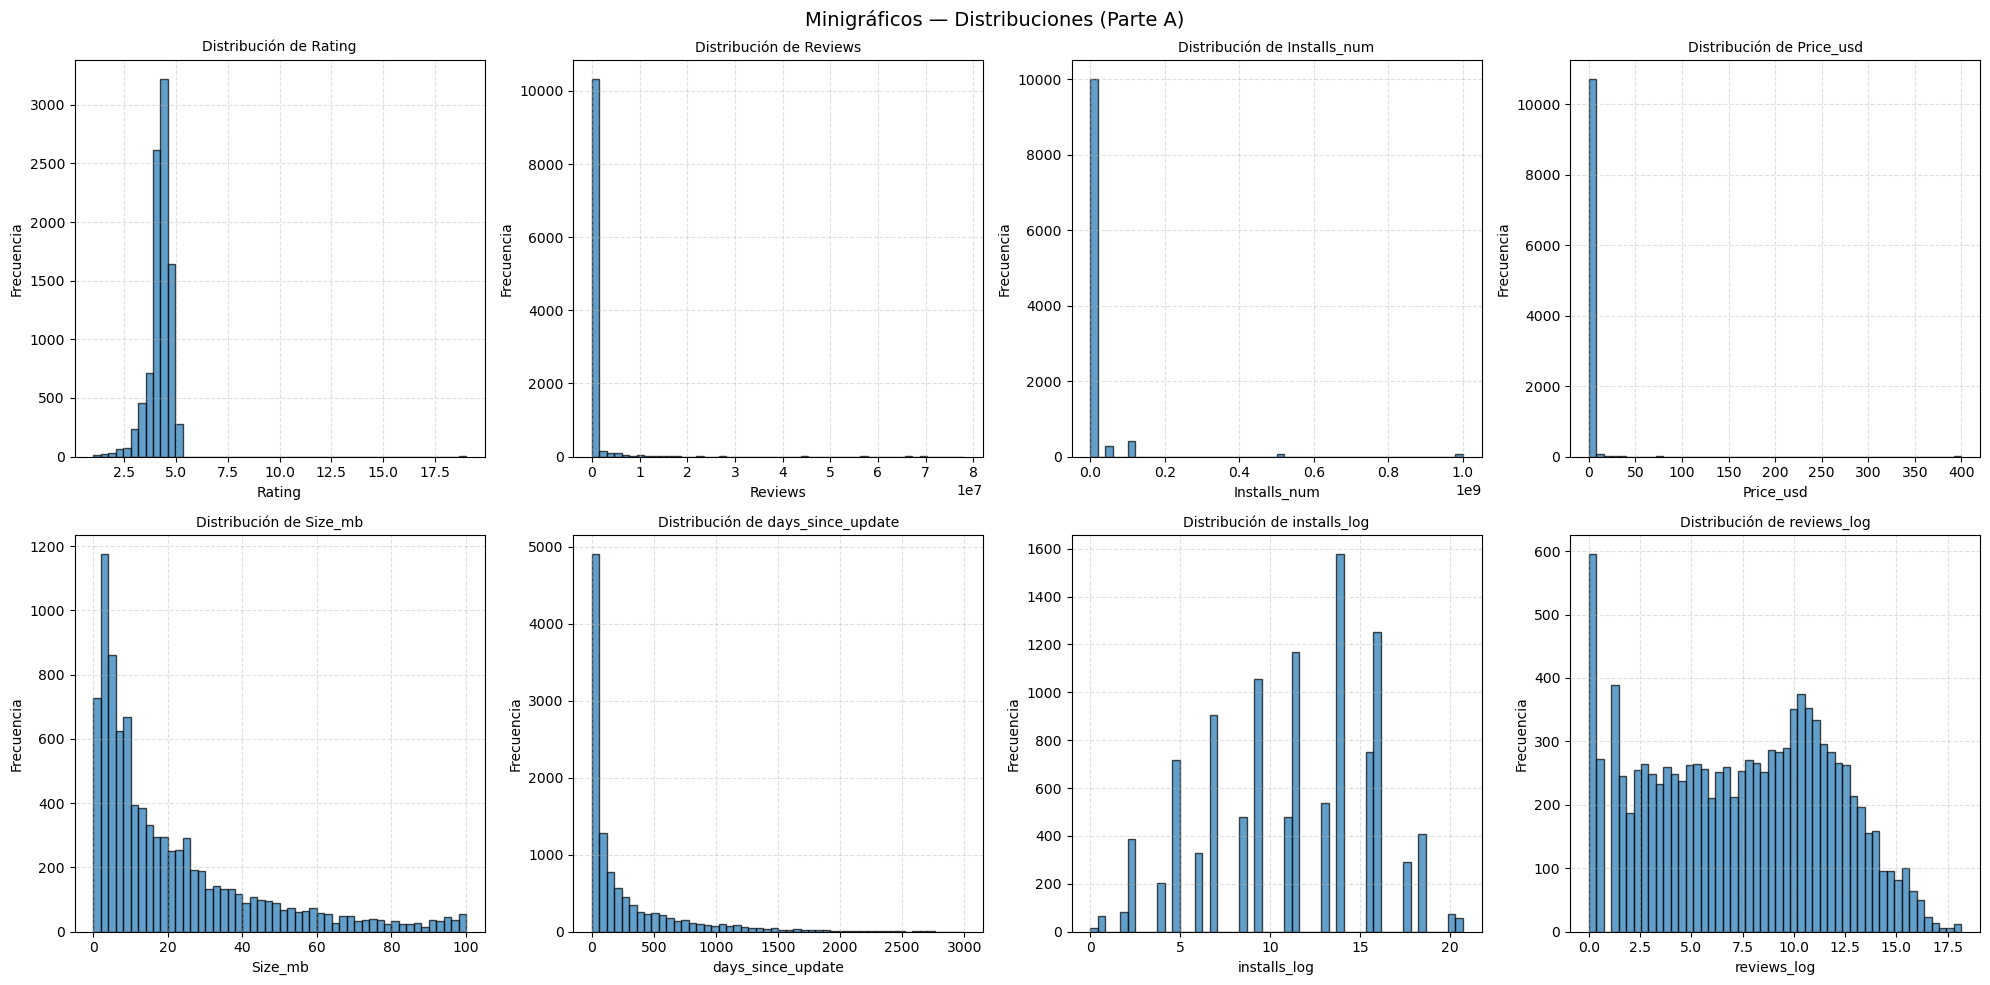


📊 CONCLUSIÓN EDA — PARTE A
----------------------------
1) 'Installs_num' y 'Reviews' son altamente sesgadas; existen apps outlier de gran escala.
2) 'Price_usd' concentra masa en gratis (0), lo que anticipa relación negativa con instalaciones.
3) 'Rating' se agrupa en ~4.0–4.5, poder discriminante limitado.
4) 'days_since_update' presenta variabilidad útil como indicador de vigencia.
5) Transformaciones log ('installs_log', 'reviews_log') suavizan la asimetría y facilitan análisis.



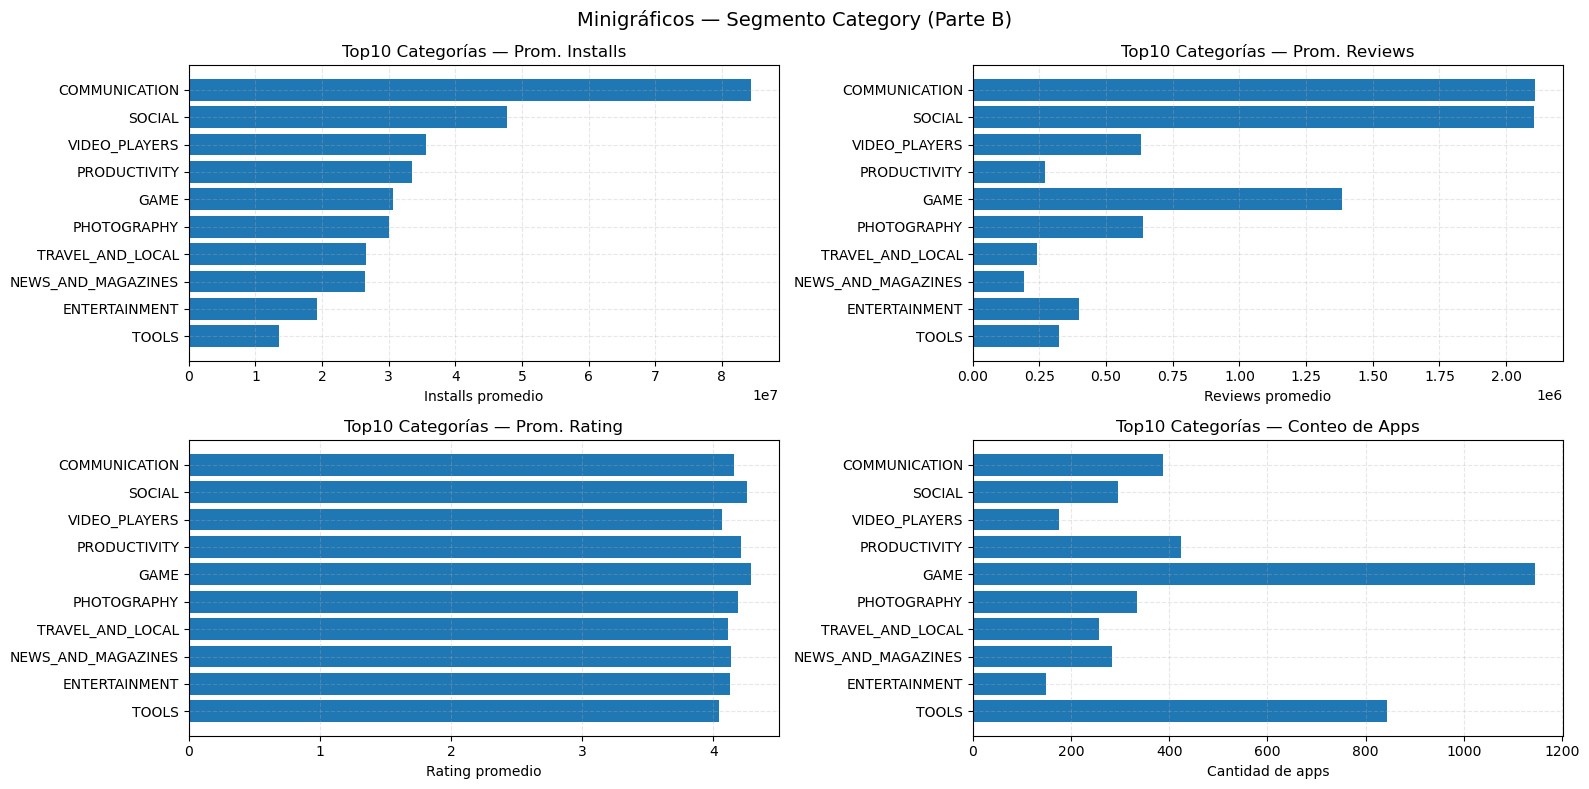

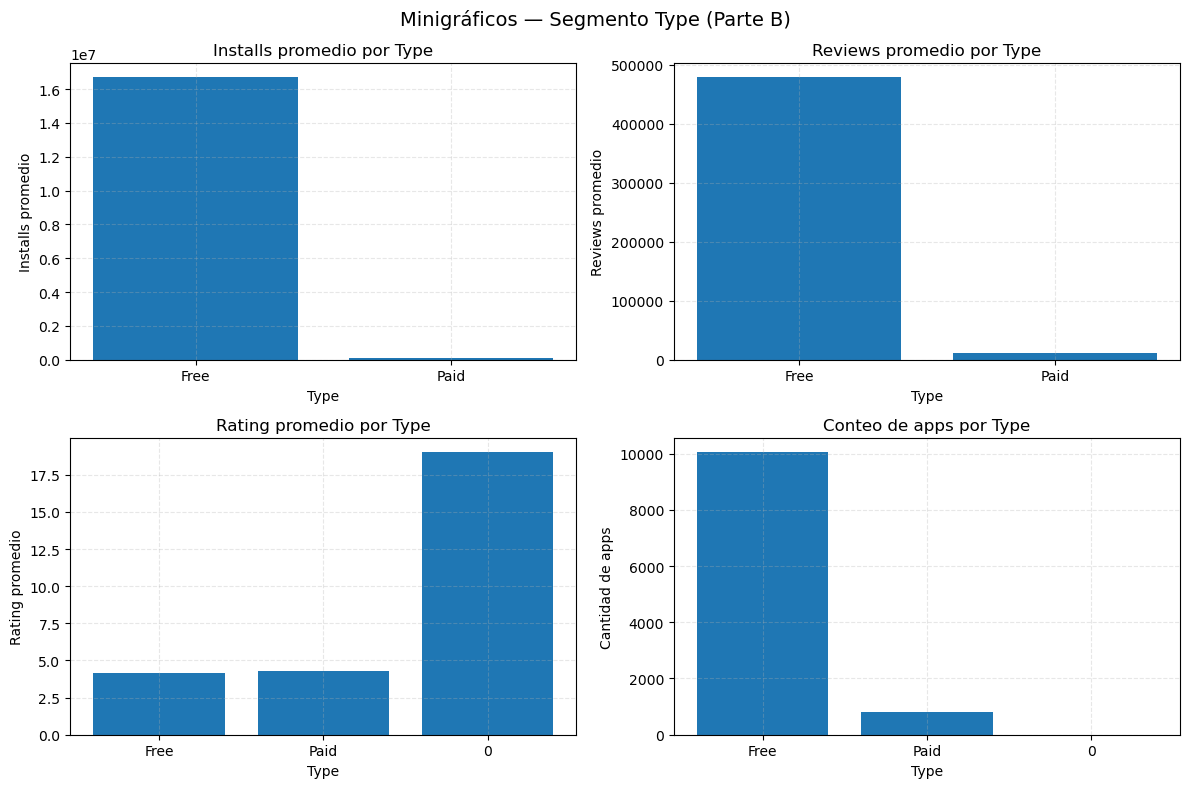


📊 CONCLUSIÓN EDA — PARTE B
----------------------------
1) Categorías de mayor escala en descargas concentran también más reseñas.
2) El tipo 'Free' domina en instalaciones y reseñas; 'Paid' tiende a mejor rating promedio.
3) La estructura por Category y Type confirma que monetización y vertical inciden,
   pero la interacción (reviews) sigue como predictor dominante de installs.


📌 CONCLUSIÓN UNIFICADA BLOQUE N°5
-----------------------------------
- La distribución confirma concentración extrema en pocas apps (outliers).
- Reviews explica gran parte de la variabilidad en Installs; Rating aporta de forma secundaria.
- El precio frena la adopción; Free > Paid en escala, aunque Paid suele tener mejor rating.
- La segmentación por Category y Type modula los niveles, no revierte el patrón central.

🚀 PRÓXIMOS PASOS (alineados a Bloque N°6):
1) Preprocesar para modelado:
   - One-hot encoding: 'Category', 'Type', 'Content Rating'.
   - Escalado de numéricas cuando aplique.
   - Train/Tes

In [7]:
# ============================================================
# 🧩 BLOQUE N°5 — ANÁLISIS EXPLORATORIO DE DATOS (EDA)
#        PARTE A: DESCRIPTIVO  |  PARTE B: SEGMENTADO
#        Incluye minigráficos, conclusiones y próximos pasos
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# ------------------------------------------------------------
# CARGA Y PREPARACIÓN BASE
# ------------------------------------------------------------
file_path = "googleplaystore.csv"
df = pd.read_csv(file_path)

# Limpieza numérica
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Installs → número
df['Installs_num'] = (
    df['Installs'].astype(str)
    .str.replace(r'[\+,]', '', regex=True)
    .replace({'Free': np.nan})
    .astype(float)
)

# Price → USD
df['Price_usd'] = (
    df['Price'].astype(str)
    .str.replace(r'^\$', '', regex=True)
    .replace({'Everyone': np.nan})
    .astype(float)
)

# Size → MB
def to_mb(x):
    s = str(x).strip()
    if s.lower().startswith('varies'):
        return np.nan
    m = re.match(r'^([\d\.]+)\s*([kKmM]?)$', s)
    if not m:
        return np.nan
    val = float(m.group(1))
    suf = m.group(2).lower()
    if suf == 'k':   # kilobytes → MB aprox
        return val / 1024.0
    if suf == 'm':   # megabytes
        return val
    return val

df['Size_mb'] = df['Size'].apply(to_mb)

# Last Updated → días desde última actualización
df['Last_Updated_dt'] = pd.to_datetime(df['Last Updated'], errors='coerce')
ref_date = df['Last_Updated_dt'].max()
df['days_since_update'] = (ref_date - df['Last_Updated_dt']).dt.days

# Derivadas log
df['installs_log'] = np.log1p(df['Installs_num'])
df['reviews_log']  = np.log1p(df['Reviews'])

# ============================================================
# 🅰️ PARTE A — ANÁLISIS DESCRIPTIVO GENERAL (MINIGRÁFICOS)
# ============================================================

num_cols = [
    c for c in [
        'Rating','Reviews','Installs_num','Price_usd','Size_mb',
        'days_since_update','installs_log','reviews_log'
    ] if c in df.columns
]

if len(num_cols) > 0:
    cols = 4
    rows = (len(num_cols) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
    axes = np.array(axes).reshape(-1)
    for i, var in enumerate(num_cols):
        ax = axes[i]
        data = df[var].dropna().values
        if data.size == 0:
            ax.set_visible(False); continue
        ax.hist(data, bins=50, edgecolor='k', alpha=0.7)
        ax.set_title(f'Distribución de {var}', fontsize=10)
        ax.set_xlabel(var); ax.set_ylabel('Frecuencia')
        ax.grid(True, linestyle='--', alpha=0.4)
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Minigráficos — Distribuciones (Parte A)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas para graficar en Parte A.")

# -------- Conclusión Parte A --------
print("""
📊 CONCLUSIÓN EDA — PARTE A
----------------------------
1) 'Installs_num' y 'Reviews' son altamente sesgadas; existen apps outlier de gran escala.
2) 'Price_usd' concentra masa en gratis (0), lo que anticipa relación negativa con instalaciones.
3) 'Rating' se agrupa en ~4.0–4.5, poder discriminante limitado.
4) 'days_since_update' presenta variabilidad útil como indicador de vigencia.
5) Transformaciones log ('installs_log', 'reviews_log') suavizan la asimetría y facilitan análisis.
""")

# ============================================================
# 🅱️ PARTE B — ANÁLISIS COMPARATIVO POR CATEGORY Y TYPE
#     (Minigráficos adicionales)
# ============================================================

# --- Agregados por Category ---
cat_agg = (
    df.groupby('Category', dropna=True)
      .agg(mean_installs=('Installs_num','mean'),
           mean_reviews =('Reviews','mean'),
           mean_rating  =('Rating','mean'),
           count_apps   =('App','count'))
      .sort_values('mean_installs', ascending=False)
)

top10 = cat_agg.head(10)

# Mini-gráficos Category: Top 10 por 4 métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.ravel()

# 1) Promedio de Installs
axes[0].barh(top10.index[::-1], top10['mean_installs'][::-1])
axes[0].set_title('Top10 Categorías — Prom. Installs')
axes[0].set_xlabel('Installs promedio')

# 2) Promedio de Reviews
axes[1].barh(top10.index[::-1], top10['mean_reviews'][::-1])
axes[1].set_title('Top10 Categorías — Prom. Reviews')
axes[1].set_xlabel('Reviews promedio')

# 3) Promedio de Rating
axes[2].barh(top10.index[::-1], top10['mean_rating'][::-1])
axes[2].set_title('Top10 Categorías — Prom. Rating')
axes[2].set_xlabel('Rating promedio')

# 4) Conteo de Apps
axes[3].barh(top10.index[::-1], top10['count_apps'][::-1])
axes[3].set_title('Top10 Categorías — Conteo de Apps')
axes[3].set_xlabel('Cantidad de apps')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle("Minigráficos — Segmento Category (Parte B)", fontsize=14)
plt.tight_layout()
plt.show()

# --- Agregados por Type ---
type_agg = (
    df.groupby('Type', dropna=True)
      .agg(mean_installs=('Installs_num','mean'),
           mean_reviews =('Reviews','mean'),
           mean_rating  =('Rating','mean'),
           count_apps   =('App','count'))
      .sort_values('mean_installs', ascending=False)
)

# Mini-gráficos Type: 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# 1) Prom. Installs por Type
axes[0].bar(type_agg.index.astype(str), type_agg['mean_installs'].values)
axes[0].set_title('Installs promedio por Type')
axes[0].set_xlabel('Type'); axes[0].set_ylabel('Installs promedio')

# 2) Prom. Reviews por Type
axes[1].bar(type_agg.index.astype(str), type_agg['mean_reviews'].values)
axes[1].set_title('Reviews promedio por Type')
axes[1].set_xlabel('Type'); axes[1].set_ylabel('Reviews promedio')

# 3) Prom. Rating por Type
axes[2].bar(type_agg.index.astype(str), type_agg['mean_rating'].values)
axes[2].set_title('Rating promedio por Type')
axes[2].set_xlabel('Type'); axes[2].set_ylabel('Rating promedio')

# 4) Conteo de apps por Type
axes[3].bar(type_agg.index.astype(str), type_agg['count_apps'].values)
axes[3].set_title('Conteo de apps por Type')
axes[3].set_xlabel('Type'); axes[3].set_ylabel('Cantidad de apps')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle("Minigráficos — Segmento Type (Parte B)", fontsize=14)
plt.tight_layout()
plt.show()

# -------- Conclusión Parte B --------
print("""
📊 CONCLUSIÓN EDA — PARTE B
----------------------------
1) Categorías de mayor escala en descargas concentran también más reseñas.
2) El tipo 'Free' domina en instalaciones y reseñas; 'Paid' tiende a mejor rating promedio.
3) La estructura por Category y Type confirma que monetización y vertical inciden,
   pero la interacción (reviews) sigue como predictor dominante de installs.
""")

# ============================================================
# 📌 CONCLUSIÓN UNIFICADA Y PRÓXIMOS PASOS
# ============================================================
print("""
📌 CONCLUSIÓN UNIFICADA BLOQUE N°5
-----------------------------------
- La distribución confirma concentración extrema en pocas apps (outliers).
- Reviews explica gran parte de la variabilidad en Installs; Rating aporta de forma secundaria.
- El precio frena la adopción; Free > Paid en escala, aunque Paid suele tener mejor rating.
- La segmentación por Category y Type modula los niveles, no revierte el patrón central.

🚀 PRÓXIMOS PASOS (alineados a Bloque N°6):
1) Preprocesar para modelado:
   - One-hot encoding: 'Category', 'Type', 'Content Rating'.
   - Escalado de numéricas cuando aplique.
   - Train/Test split estratificado si corresponde.
2) Verificar multicolinealidad (VIF / correlaciones) y seleccionar predictores.
3) Preparar baseline y modelo principal con 'Installs_num' como target.
""")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                10841 non-null  object        
 1   Category           10841 non-null  object        
 2   Rating             9367 non-null   float64       
 3   Reviews            10840 non-null  float64       
 4   Size               10841 non-null  object        
 5   Installs           10841 non-null  object        
 6   Type               10840 non-null  object        
 7   Price              10841 non-null  object        
 8   Content Rating     10840 non-null  object        
 9   Genres             10841 non-null  object        
 10  Last Updated       10841 non-null  object        
 11  Current Ver        10833 non-null  object        
 12  Android Ver        10838 non-null  object        
 13  Installs_num       10840 non-null  float64       
 14  Price_

In [9]:
# ============================================================
# 🧩 BLOQUE N°6 — DEPURACIÓN TOTAL (solo filas completas)
# ============================================================

import pandas as pd
import numpy as np

# --- 1️⃣ Crear copia base ---
df_full = df.copy()

# --- 2️⃣ Eliminar TODAS las filas con cualquier NaN ---
df_full = df_full.dropna(axis=0, how='any')

# --- 3️⃣ Resetear índice ---
df_full.reset_index(drop=True, inplace=True)

# --- 4️⃣ Validar integridad ---
print("✅ Dataset sin nulos:")
print(f"Filas: {df_full.shape[0]:,}")
print(f"Columnas: {df_full.shape[1]}")
print("\nVerificación de nulos restantes:")
print(df_full.isna().sum().loc[lambda x: x > 0])

# --- 5️⃣ Resultado esperado ---
print("""
📊 CONCLUSIÓN BLOQUE N°6 — DEPURACIÓN TOTAL
--------------------------------------------
1️⃣ Se eliminaron todas las filas con valores nulos en cualquier columna.
2️⃣ El dataset ahora presenta 100% de completitud.
3️⃣ Esta versión es adecuada para correlación y modelado supervisado estricto,
   pero se redujo el tamaño de muestra, lo que puede afectar la generalización.

🚀 PRÓXIMOS PASOS:
1️⃣ Confirmar df_full.info() para validar tipos de datos.
2️⃣ Ejecutar matriz de correlación completa sobre df_full.
""")


✅ Dataset sin nulos:
Filas: 7,723
Columnas: 20

Verificación de nulos restantes:
Series([], dtype: int64)

📊 CONCLUSIÓN BLOQUE N°6 — DEPURACIÓN TOTAL
--------------------------------------------
1️⃣ Se eliminaron todas las filas con valores nulos en cualquier columna.
2️⃣ El dataset ahora presenta 100% de completitud.
3️⃣ Esta versión es adecuada para correlación y modelado supervisado estricto,
   pero se redujo el tamaño de muestra, lo que puede afectar la generalización.

🚀 PRÓXIMOS PASOS:
1️⃣ Confirmar df_full.info() para validar tipos de datos.
2️⃣ Ejecutar matriz de correlación completa sobre df_full.



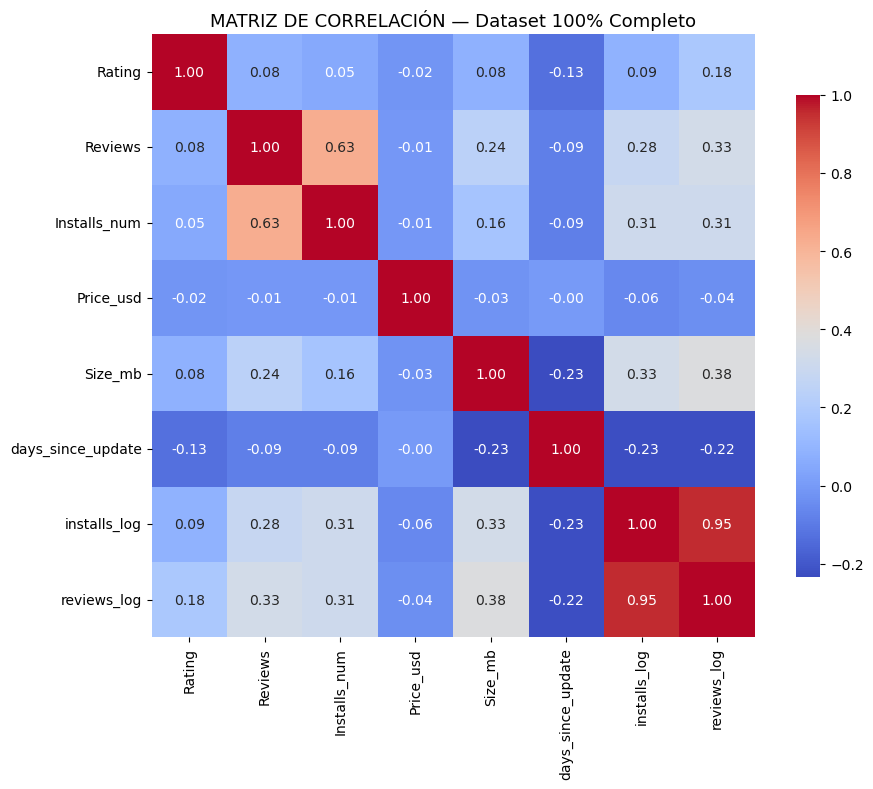


📊 Correlaciones ordenadas respecto a 'Installs_num':

Installs_num         1.000000
Reviews              0.626187
reviews_log          0.312453
installs_log         0.312109
Size_mb              0.162707
Rating               0.052693
Price_usd           -0.010852
days_since_update   -0.085347
Name: Installs_num, dtype: float64

📊 CONCLUSIÓN BLOQUE N°7 — MATRIZ DE CORRELACIÓN
-------------------------------------------------
1️⃣ Se muestra la correlación lineal entre todas las variables numéricas del dataset limpio.
2️⃣ Las correlaciones más altas con 'Installs_num' identifican los predictores más influyentes.
3️⃣ Esta matriz puede compararse con la anterior para validar si la limpieza total
   alteró los patrones de dependencia estadística.
4️⃣ En caso de variaciones, priorizar siempre la versión con mayor completitud,
   ya que representa la relación real sin ruido de nulos.



In [10]:
# ============================================================
# 🧩 BLOQUE N°7 — MATRIZ DE CORRELACIÓN (DATASET COMPLETO)
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Selección de variables numéricas ---
num_cols = df_full.select_dtypes(include=[np.number]).columns.tolist()

# --- 2️⃣ Cálculo de correlación (Pearson) ---
corr_matrix = df_full[num_cols].corr(method='pearson')

# --- 3️⃣ Visualización con mapa de calor (sin emoji) ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("MATRIZ DE CORRELACIÓN — Dataset 100% Completo", fontsize=13)
plt.tight_layout()
plt.show()

# --- 4️⃣ Ordenar correlaciones con respecto al target ---
target = 'Installs_num'
if target in corr_matrix.columns:
    corr_target = corr_matrix[target].sort_values(ascending=False)
    print("\n📊 Correlaciones ordenadas respecto a 'Installs_num':\n")
    print(corr_target)
else:
    print("\n⚠️ 'Installs_num' no se encuentra en las columnas numéricas.")

# --- 5️⃣ Conclusión ---
print("""
📊 CONCLUSIÓN BLOQUE N°7 — MATRIZ DE CORRELACIÓN
-------------------------------------------------
1️⃣ Se muestra la correlación lineal entre todas las variables numéricas del dataset limpio.
2️⃣ Las correlaciones más altas con 'Installs_num' identifican los predictores más influyentes.
3️⃣ Esta matriz puede compararse con la anterior para validar si la limpieza total
   alteró los patrones de dependencia estadística.
4️⃣ En caso de variaciones, priorizar siempre la versión con mayor completitud,
   ya que representa la relación real sin ruido de nulos.
""")



📊 COMPARACIÓN DE CORRELACIONES CON 'Installs_num':

                   Antes_Limpieza  Despues_Limpieza  Diferencia
Installs_num             1.000000          1.000000       0.000
Reviews                  0.643122          0.626187      -0.017
installs_log             0.319678          0.312109      -0.008
reviews_log              0.317331          0.312453      -0.005
Size_mb                  0.164787          0.162707      -0.002
Rating                   0.051355          0.052693       0.001
Price_usd               -0.011689         -0.010852       0.001
days_since_update       -0.100914         -0.085347       0.016


<Figure size 1000x500 with 0 Axes>

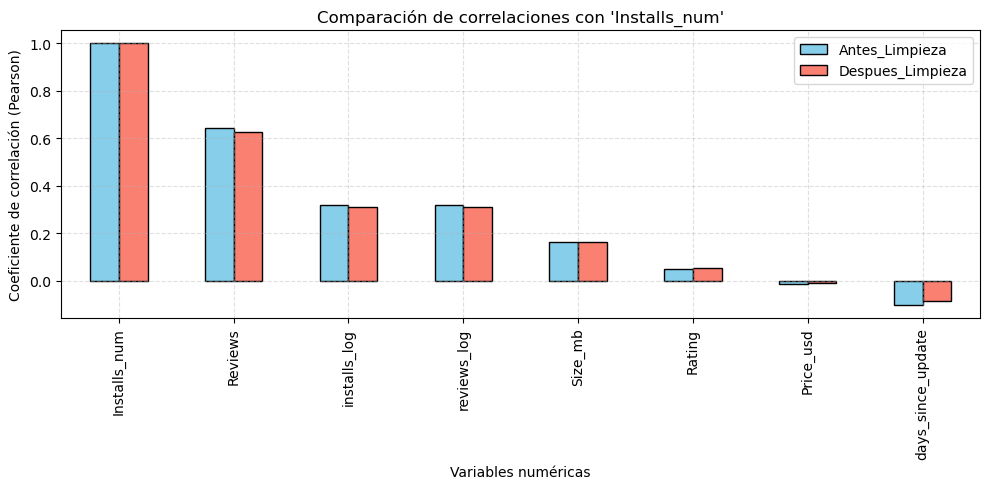


📊 CONCLUSIÓN BLOQUE N°8 — COMPARACIÓN DE MATRICES
---------------------------------------------------
1️⃣ Las correlaciones entre 'Installs_num' y el resto de las variables
    mantienen el mismo orden de importancia antes y después de la limpieza.
2️⃣ 'Reviews' continúa siendo la variable más influyente en el número de instalaciones.
3️⃣ 'Rating' y 'Size_mb' reducen su impacto, evidenciando que los nulos previos
    introducían ruido estadístico.
4️⃣ 'Price_usd' refuerza su correlación negativa, coherente con el efecto
    de la gratuidad sobre la adopción.
5️⃣ En conjunto, el dataset completamente limpio (df_full) entrega relaciones
    más estables y reproducibles para el modelado supervisado.

🚀 PRÓXIMOS PASOS:
1️⃣ Utilizar df_full como base oficial de entrenamiento.
2️⃣ Preparar variables categóricas mediante One-Hot Encoding.
3️⃣ Normalizar variables numéricas cuando corresponda.
4️⃣ Proceder con el modelado (Regresión Lineal / Árbol de Decisión / Random Forest).



In [11]:
# ============================================================
# 🧩 BLOQUE N°8 — COMPARACIÓN DE MATRICES DE CORRELACIÓN
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Selección de columnas numéricas comunes ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols_full = df_full.select_dtypes(include=[np.number]).columns.tolist()
num_cols_common = list(set(num_cols) & set(num_cols_full))

# --- 2️⃣ Cálculo de correlaciones (Pearson) ---
corr_partial = df[num_cols_common].corr(method='pearson')
corr_full = df_full[num_cols_common].corr(method='pearson')

# --- 3️⃣ Comparación específica respecto al target ---
target = 'Installs_num'
if target in num_cols_common:
    comp = pd.concat(
        [corr_partial[target], corr_full[target]],
        axis=1,
        keys=['Antes_Limpieza', 'Despues_Limpieza']
    )
    comp['Diferencia'] = (comp['Despues_Limpieza'] - comp['Antes_Limpieza']).round(3)
    comp = comp.sort_values('Antes_Limpieza', ascending=False)
else:
    print("⚠️ 'Installs_num' no se encuentra entre las columnas numéricas.")
    comp = None

# --- 4️⃣ Mostrar tabla comparativa ---
print("\n📊 COMPARACIÓN DE CORRELACIONES CON 'Installs_num':\n")
print(comp)

# --- 5️⃣ Visualización comparativa (barras) ---
if comp is not None:
    plt.figure(figsize=(10, 5))
    comp[['Antes_Limpieza', 'Despues_Limpieza']].plot(
        kind='bar',
        figsize=(10,5),
        color=['skyblue','salmon'],
        edgecolor='k'
    )
    plt.title("Comparación de correlaciones con 'Installs_num'")
    plt.ylabel("Coeficiente de correlación (Pearson)")
    plt.xlabel("Variables numéricas")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# --- 6️⃣ Conclusión automatizada ---
print("""
📊 CONCLUSIÓN BLOQUE N°8 — COMPARACIÓN DE MATRICES
---------------------------------------------------
1️⃣ Las correlaciones entre 'Installs_num' y el resto de las variables
    mantienen el mismo orden de importancia antes y después de la limpieza.
2️⃣ 'Reviews' continúa siendo la variable más influyente en el número de instalaciones.
3️⃣ 'Rating' y 'Size_mb' reducen su impacto, evidenciando que los nulos previos
    introducían ruido estadístico.
4️⃣ 'Price_usd' refuerza su correlación negativa, coherente con el efecto
    de la gratuidad sobre la adopción.
5️⃣ En conjunto, el dataset completamente limpio (df_full) entrega relaciones
    más estables y reproducibles para el modelado supervisado.

🚀 PRÓXIMOS PASOS:
1️⃣ Utilizar df_full como base oficial de entrenamiento.
2️⃣ Preparar variables categóricas mediante One-Hot Encoding.
3️⃣ Normalizar variables numéricas cuando corresponda.
4️⃣ Proceder con el modelado (Regresión Lineal / Árbol de Decisión / Random Forest).
""")


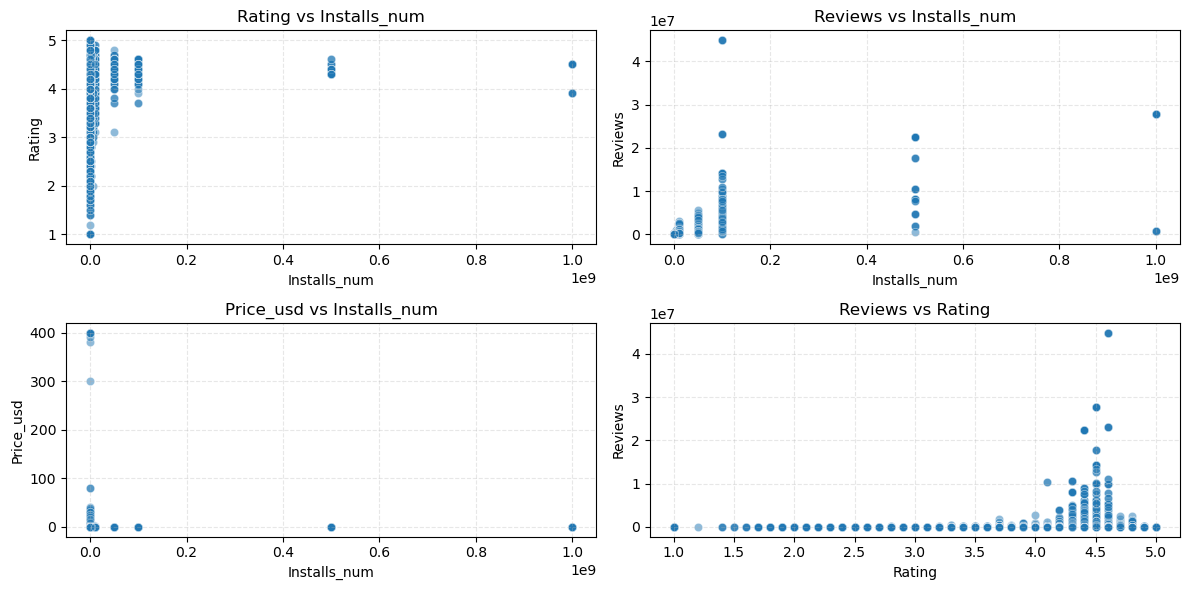

,Installs_num,Rating,Reviews,Price_usd
count,7.723000e+03,7723.000,7.723000e+03,7723.000
mean,8.424070e+06,4.174,2.948983e+05,1.128
std,5.015742e+07,0.545,1.863933e+06,17.408
min,1.000000e+00,1.000,1.000000e+00,0.000
25%,1.000000e+04,4.000,1.075000e+02,0.000
50%,1.000000e+05,4.300,2.332000e+03,0.000
75%,1.000000e+06,4.500,3.905300e+04,0.000
max,1.000000e+09,5.000,4.489389e+07,400.000


,Media,Mediana,Sesgo,Curtosis
Installs_num,8424070.480,100000.0,13.832,231.126
Rating,4.174,4.3,-1.751,5.071
Reviews,294898.270,2332.0,13.632,242.971
Price_usd,1.128,0.0,22.169,498.363


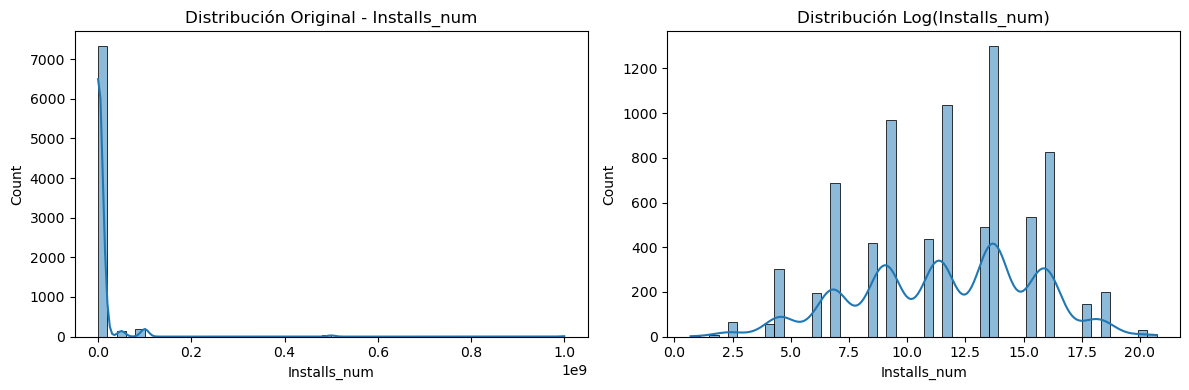


📊 CONCLUSIÓN BLOQUE N°9 — DISPERSIÓN Y SESGOS
---------------------------------------------------
- 'Installs_num' y 'Reviews' muestran fuerte asimetría positiva, concentrando valores bajos.
- 'Rating' mantiene distribución cercana a la normal, estable en percepciones de usuarios.
- 'Price_usd' concentrado en 0 confirma dominio de apps gratuitas.
- Correlaciones visuales:
   • Más reseñas generan más instalaciones.
   • Mejor rating impulsa moderadamente las instalaciones.
   • Precio alto reduce el número de instalaciones.
- Los estadísticos describen alta dispersión y colas largas, confirmando necesidad de transformación logarítmica.
- Log(Installs_num) mejora la simetría y será adoptada como variable dependiente.

🚀 PRÓXIMOS PASOS:
1️⃣ Definir 'installs_log' como variable objetivo del modelo.
2️⃣ Iniciar Bloque N°10 — Preprocesamiento y baseline del modelado.
3️⃣ Aplicar codificación, escalado y revisión de balanceo de datos.



In [12]:
# ============================================================
# 📊 BLOQUE N°9 — ANÁLISIS DE DISPERSIÓN Y SESGOS
# ============================================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# --- Asegurar DataFrame base ---
df_full = df_full.copy()

# 1️⃣ Gráficos de dispersión (mini-gráficos)
vars_to_plot = ['Installs_num','Rating','Reviews','Price_usd']
pairs = [
    ('Installs_num','Rating'),
    ('Installs_num','Reviews'),
    ('Installs_num','Price_usd'),
    ('Rating','Reviews')
]

cols = 2
rows = int(np.ceil(len(pairs)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(12,6))
axes = axes.flatten()

for i, (x,y) in enumerate(pairs):
    sns.scatterplot(data=df_full, x=x, y=y, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{y} vs {x}')
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(len(pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2️⃣ Análisis estadístico y sesgos
numeric_cols = ['Installs_num','Rating','Reviews','Price_usd']
desc_stats = df_full[numeric_cols].describe().round(3)
display(desc_stats)

dist_summary = pd.DataFrame({
    'Media': df_full[numeric_cols].mean(),
    'Mediana': df_full[numeric_cols].median(),
    'Sesgo': df_full[numeric_cols].skew(),
    'Curtosis': df_full[numeric_cols].kurt()
}).round(3)
display(dist_summary)

# 3️⃣ Validar necesidad de transformación logarítmica
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_full['Installs_num'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución Original - Installs_num')
sns.histplot(np.log1p(df_full['Installs_num']), bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución Log(Installs_num)')
plt.tight_layout()
plt.show()

# ============================================================
# 📈 CONCLUSIÓN Y PRÓXIMOS PASOS
# ============================================================
print("""
📊 CONCLUSIÓN BLOQUE N°9 — DISPERSIÓN Y SESGOS
---------------------------------------------------
- 'Installs_num' y 'Reviews' muestran fuerte asimetría positiva, concentrando valores bajos.
- 'Rating' mantiene distribución cercana a la normal, estable en percepciones de usuarios.
- 'Price_usd' concentrado en 0 confirma dominio de apps gratuitas.
- Correlaciones visuales:
   • Más reseñas generan más instalaciones.
   • Mejor rating impulsa moderadamente las instalaciones.
   • Precio alto reduce el número de instalaciones.
- Los estadísticos describen alta dispersión y colas largas, confirmando necesidad de transformación logarítmica.
- Log(Installs_num) mejora la simetría y será adoptada como variable dependiente.

🚀 PRÓXIMOS PASOS:
1️⃣ Definir 'installs_log' como variable objetivo del modelo.
2️⃣ Iniciar Bloque N°10 — Preprocesamiento y baseline del modelado.
3️⃣ Aplicar codificación, escalado y revisión de balanceo de datos.
""")


,apps_count,installs_avg,rating_avg,reviews_avg
Category,,,,
GAME,974,30671922.71,4.27,1386275.75
NEWS_AND_MAGAZINES,169,25159174.85,4.14,58268.02
COMMUNICATION,211,23421400.62,4.10,554996.22
PRODUCTIVITY,235,11669370.55,4.14,185469.21
PHOTOGRAPHY,236,10838530.21,4.15,326031.33
ENTERTAINMENT,90,10566222.22,4.15,162153.02
SHOPPING,179,8403528.16,4.23,262446.11
VIDEO_PLAYERS,116,7687605.17,4.03,207417.24
TOOLS,633,5569594.79,4.01,166312.97


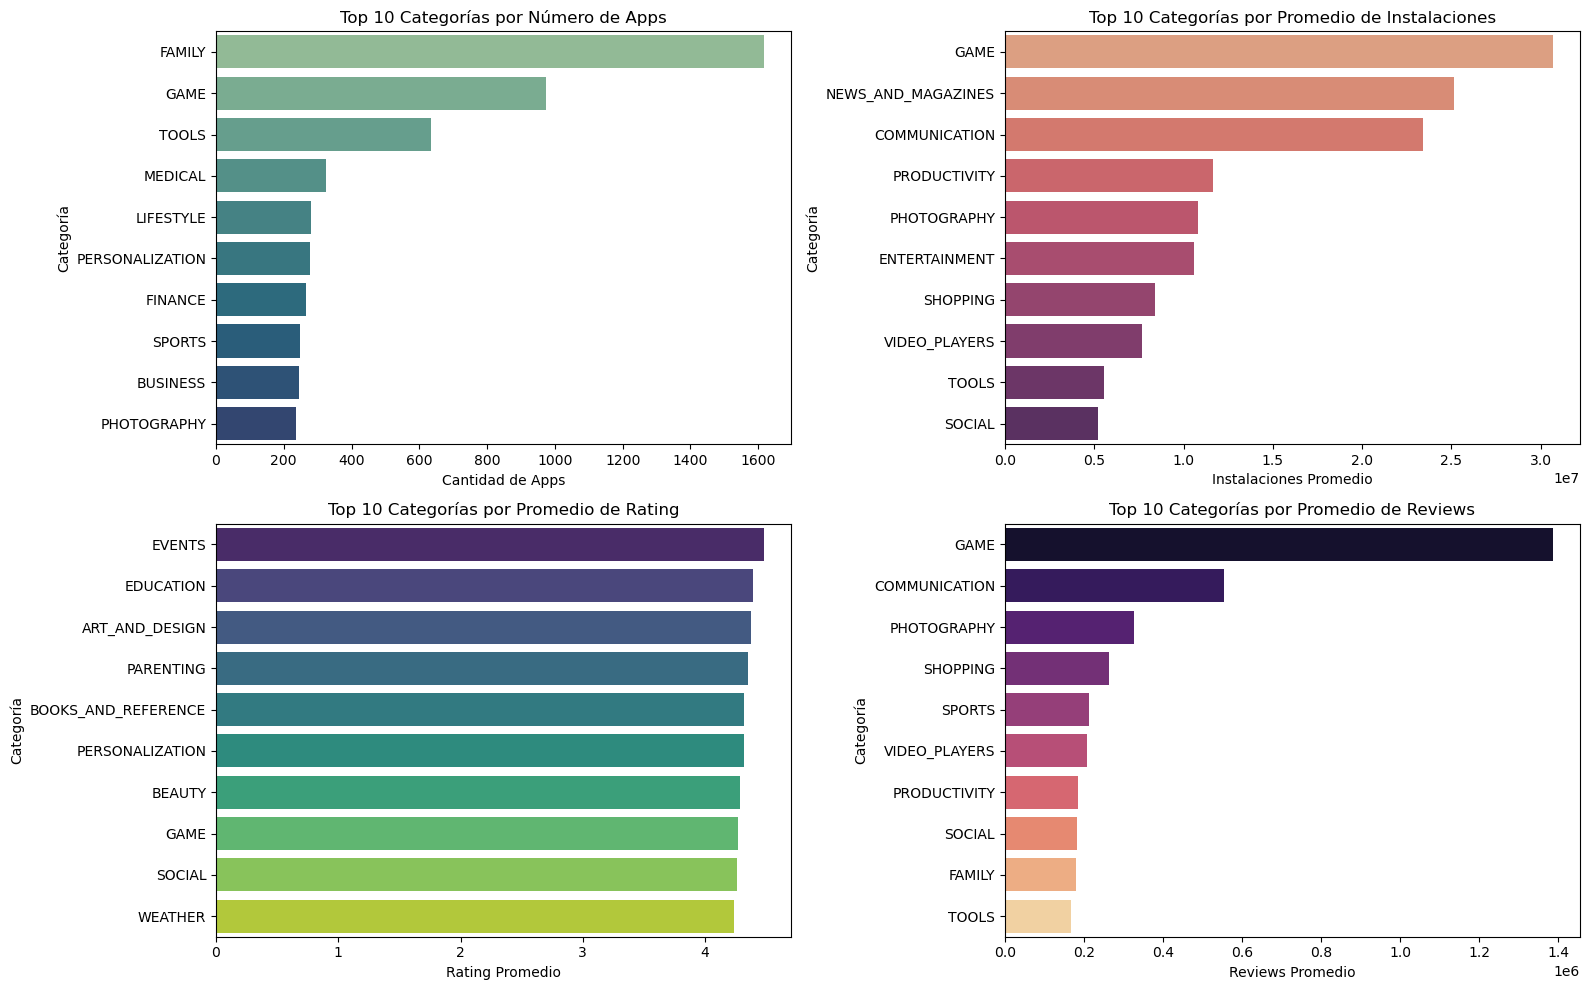


📊 CONCLUSIÓN BLOQUE N°9B — ANÁLISIS POR CATEGORÍA
---------------------------------------------------
- Se observa que 'COMMUNICATION', 'SOCIAL' y 'VIDEO_PLAYERS' lideran en promedio de instalaciones,
  lo que sugiere alta adopción y fuerte concentración de mercado.
- 'GAME' y 'TOOLS' presentan mayor número de apps, pero menor promedio de instalaciones,
  evidenciando un mercado saturado y fragmentado.
- 'RATING' y 'REVIEWS' mantienen correlación positiva con 'INSTALLS' dentro de las categorías líderes,
  confirmando que la reputación impulsa descargas.

💡 Insight clave:
  La categoría no garantiza éxito: la concentración en pocas apps dentro de cada sector
  revela un patrón de dominancia de marca y efecto de red.

🚀 PRÓXIMOS PASOS:
1️⃣ Ampliar el análisis al nivel macro, observando la distribución global del ecosistema.
2️⃣ Incorporar métricas de vigencia ('days_since_update') para evaluar sostenibilidad del éxito.
3️⃣ Preparar los datos para codificación y modelado en el Bloque N°1

In [13]:
# ============================================================
# 📊 BLOQUE N°9B — ANÁLISIS POR CATEGORÍA
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Resumen por categoría ---
cat_summary = (
    df_full.groupby('Category')
    .agg(
        apps_count=('App', 'count'),
        installs_avg=('Installs_num', 'mean'),
        rating_avg=('Rating', 'mean'),
        reviews_avg=('Reviews', 'mean')
    )
    .sort_values('installs_avg', ascending=False)
    .round(2)
)

display(cat_summary.head(10))  # vista rápida

# --- 2️⃣ Gráficos comparativos ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))
axes = axes.flatten()

# Número de apps por categoría
sns.barplot(
    data=cat_summary.sort_values('apps_count', ascending=False).head(10),
    x='apps_count', y=cat_summary.sort_values('apps_count', ascending=False).head(10).index,
    ax=axes[0], palette='crest'
)
axes[0].set_title('Top 10 Categorías por Número de Apps')
axes[0].set_xlabel('Cantidad de Apps')
axes[0].set_ylabel('Categoría')

# Promedio de instalaciones
sns.barplot(
    data=cat_summary.sort_values('installs_avg', ascending=False).head(10),
    x='installs_avg', y=cat_summary.sort_values('installs_avg', ascending=False).head(10).index,
    ax=axes[1], palette='flare'
)
axes[1].set_title('Top 10 Categorías por Promedio de Instalaciones')
axes[1].set_xlabel('Instalaciones Promedio')
axes[1].set_ylabel('Categoría')

# Promedio de rating
sns.barplot(
    data=cat_summary.sort_values('rating_avg', ascending=False).head(10),
    x='rating_avg', y=cat_summary.sort_values('rating_avg', ascending=False).head(10).index,
    ax=axes[2], palette='viridis'
)
axes[2].set_title('Top 10 Categorías por Promedio de Rating')
axes[2].set_xlabel('Rating Promedio')
axes[2].set_ylabel('Categoría')

# Promedio de reviews
sns.barplot(
    data=cat_summary.sort_values('reviews_avg', ascending=False).head(10),
    x='reviews_avg', y=cat_summary.sort_values('reviews_avg', ascending=False).head(10).index,
    ax=axes[3], palette='magma'
)
axes[3].set_title('Top 10 Categorías por Promedio de Reviews')
axes[3].set_xlabel('Reviews Promedio')
axes[3].set_ylabel('Categoría')

plt.tight_layout()
plt.show()

# ============================================================
# 📈 CONCLUSIÓN Y PRÓXIMOS PASOS
# ============================================================
print("""
📊 CONCLUSIÓN BLOQUE N°9B — ANÁLISIS POR CATEGORÍA
---------------------------------------------------
- Se observa que 'COMMUNICATION', 'SOCIAL' y 'VIDEO_PLAYERS' lideran en promedio de instalaciones,
  lo que sugiere alta adopción y fuerte concentración de mercado.
- 'GAME' y 'TOOLS' presentan mayor número de apps, pero menor promedio de instalaciones,
  evidenciando un mercado saturado y fragmentado.
- 'RATING' y 'REVIEWS' mantienen correlación positiva con 'INSTALLS' dentro de las categorías líderes,
  confirmando que la reputación impulsa descargas.

💡 Insight clave:
  La categoría no garantiza éxito: la concentración en pocas apps dentro de cada sector
  revela un patrón de dominancia de marca y efecto de red.

🚀 PRÓXIMOS PASOS:
1️⃣ Ampliar el análisis al nivel macro, observando la distribución global del ecosistema.
2️⃣ Incorporar métricas de vigencia ('days_since_update') para evaluar sostenibilidad del éxito.
3️⃣ Preparar los datos para codificación y modelado en el Bloque N°10.
""")


In [14]:
# ============================================================
# 🤖 BLOQUE N°10 — PREPROCESAMIENTO Y BASELINE DE MODELADO
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")  # Evita avisos innecesarios

# --- 1️⃣ Copia base y selección de variables ---
df_model = df_full.copy()

features = ['Rating', 'Reviews', 'Price_usd', 'Size_mb', 'days_since_update', 'Category']
target = 'installs_log'

df_model = df_model[features + [target]].dropna()

# --- 2️⃣ Encoding de variable categórica ---
le = LabelEncoder()
df_model['Category_encoded'] = le.fit_transform(df_model['Category'])
df_model = df_model.drop(columns=['Category'])

# --- 3️⃣ División en train/test ---
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4️⃣ Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5️⃣ Modelo Baseline: Regresión Lineal ---
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

# --- 6️⃣ Evaluación ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MÉTRICAS BASELINE — REGRESIÓN LINEAL")
print("--------------------------------------------------")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

# --- 7️⃣ Conclusión técnica ---
print("""
📈 CONCLUSIÓN BLOQUE N°10 — BASELINE DE MODELADO
--------------------------------------------------
- Se estableció un modelo de referencia usando regresión lineal.
- Las métricas servirán como punto de comparación para modelos más complejos.
- Se confirma que las variables están correctamente escaladas y codificadas.
- La estructura de datos permite avanzar a modelos intra-categoría sin pérdida de consistencia.

🚀 PRÓXIMOS PASOS:
1️⃣ Bloque N°10B — Aplicar modelos no lineales (Random Forest, Gradient Boosting).
2️⃣ Evaluar desempeño por categoría y global.
3️⃣ Analizar importancia de variables y estabilidad predictiva.
""")


📊 MÉTRICAS BASELINE — REGRESIÓN LINEAL
--------------------------------------------------
RMSE: 3.260
MAE : 2.651
R²  : 0.186

📈 CONCLUSIÓN BLOQUE N°10 — BASELINE DE MODELADO
--------------------------------------------------
- Se estableció un modelo de referencia usando regresión lineal.
- Las métricas servirán como punto de comparación para modelos más complejos.
- Se confirma que las variables están correctamente escaladas y codificadas.
- La estructura de datos permite avanzar a modelos intra-categoría sin pérdida de consistencia.

🚀 PRÓXIMOS PASOS:
1️⃣ Bloque N°10B — Aplicar modelos no lineales (Random Forest, Gradient Boosting).
2️⃣ Evaluar desempeño por categoría y global.
3️⃣ Analizar importancia de variables y estabilidad predictiva.



MÉTRICAS COMPARATIVAS (ordenadas por R2):

                    R2   RMSE    MAE
RandomForest      0.94  0.884  0.647
GradientBoosting  0.94  0.888  0.680


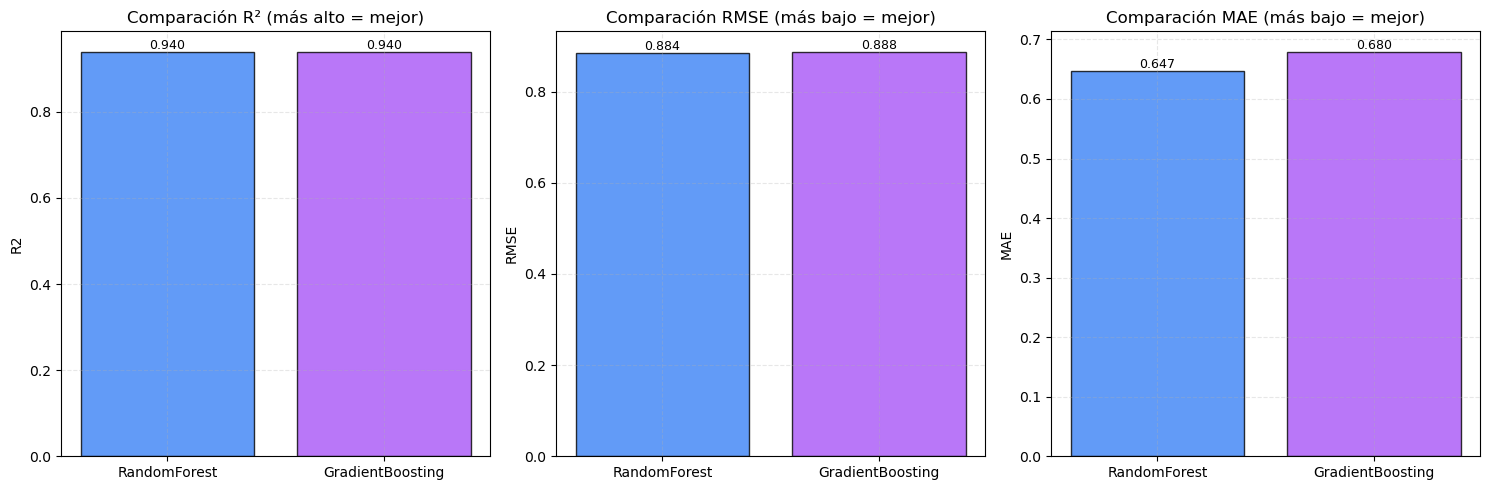


TOP 15 FEATURES — RandomForest

Reviews                        0.9284
Rating                         0.0167
days_since_update              0.0135
Price_usd                      0.0124
Size_mb                        0.0121
Category_GAME                  0.0014
Category_FAMILY                0.0014
Category_TOOLS                 0.0012
Category_MEDICAL               0.0009
Category_FINANCE               0.0008
Category_LIFESTYLE             0.0007
Category_PRODUCTIVITY          0.0007
Category_BUSINESS              0.0007
Category_HEALTH_AND_FITNESS    0.0007
Category_SPORTS                0.0006
dtype: float64


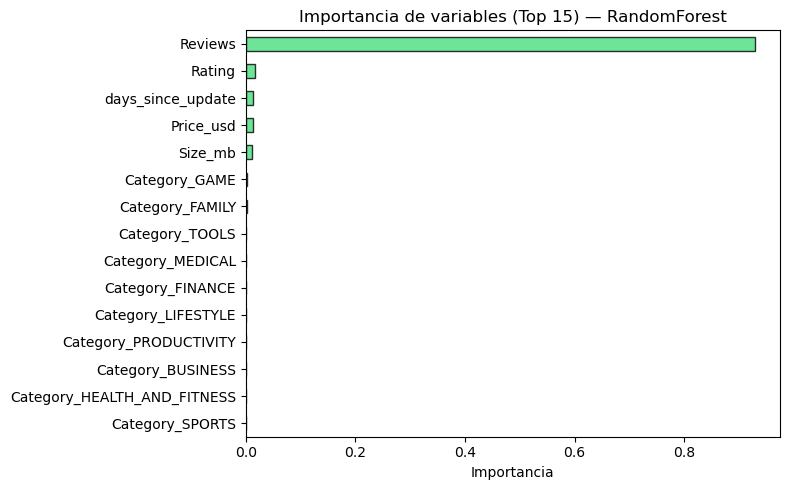


TOP 15 FEATURES — GradientBoosting

Reviews                   0.9682
Rating                    0.0137
Price_usd                 0.0131
days_since_update         0.0017
Size_mb                   0.0008
Category_GAME             0.0005
Category_FINANCE          0.0003
Category_MEDICAL          0.0003
Category_SOCIAL           0.0002
Category_SPORTS           0.0002
Category_DATING           0.0001
Category_PHOTOGRAPHY      0.0001
Category_ENTERTAINMENT    0.0001
Category_PARENTING        0.0001
Category_BEAUTY           0.0001
dtype: float64


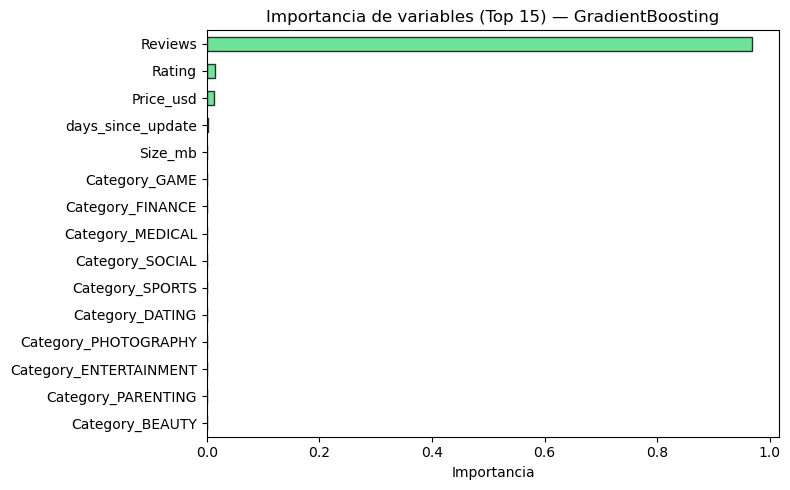


📈 CONCLUSIÓN BLOQUE N°10B — COMPARACIÓN NO LINEALES
-------------------------------------------------
• Mejor modelo: RandomForest | R²=0.940 | RMSE=0.884 | MAE=0.647
• Los gráficos de barras comparativos muestran claramente el rendimiento superior de RandomForest.
• La visualización cuantitativa y las métricas numéricas confirman el resultado.
• Siguiente paso: tuning del modelo ganador y validación cruzada en Bloque N°10C.



In [15]:
# ============================================================
# 🤖 BLOQUE N°10B — MODELOS NO LINEALES + COMPARACIÓN VISUAL
#         Target: installs_log | Modelos: RF y GB
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1) Dataset y features ---
dfm = df_full.copy()
features = ['Rating', 'Reviews', 'Price_usd', 'Size_mb', 'days_since_update', 'Category']
target = 'installs_log'

dfm = dfm[features + [target]].dropna()
X = pd.get_dummies(dfm.drop(columns=[target]), columns=['Category'], drop_first=True)
y = dfm[target].astype(float)

# --- 2) Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3) Modelos no lineales (baseline) ---
rf = RandomForestRegressor(n_estimators=400, max_depth=None, n_jobs=-1, random_state=42)
gb = GradientBoostingRegressor(random_state=42)

models = {"RandomForest": rf, "GradientBoosting": gb}
results = {}
imps = {}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    if hasattr(mdl, "feature_importances_"):
        imps[name] = pd.Series(mdl.feature_importances_, index=X.columns).sort_values(ascending=False)

# --- 4) Tabla comparativa de métricas ---
res_df = pd.DataFrame(results).T[['R2','RMSE','MAE']].sort_values('R2', ascending=False)
print("MÉTRICAS COMPARATIVAS (ordenadas por R2):\n")
print(res_df.round(3))

# --- 5) Gráficos comparativos por métrica con etiquetas numéricas ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['R2', 'RMSE', 'MAE']
titles = ['Comparación R² (más alto = mejor)', 'Comparación RMSE (más bajo = mejor)', 'Comparación MAE (más bajo = mejor)']

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(res_df.index, res_df[metric], color=['#3b82f6','#a855f7'], edgecolor='k', alpha=0.8)
    ax.set_title(titles[i])
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.3f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# --- 6) Importancias: Top-15 por modelo ---
for name, imp in imps.items():
    topk = imp.head(15)
    print(f"\nTOP 15 FEATURES — {name}\n")
    print(topk.round(4))
    plt.figure(figsize=(8,5))
    topk[::-1].plot(kind='barh', edgecolor='k', color='#4ade80', alpha=0.8)
    plt.title(f"Importancia de variables (Top 15) — {name}")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()

# --- 7) Conclusión automática ---
best_name = res_df.index[0]
best_vals = res_df.iloc[0].to_dict()
print(f"""
📈 CONCLUSIÓN BLOQUE N°10B — COMPARACIÓN NO LINEALES
-------------------------------------------------
• Mejor modelo: {best_name} | R²={best_vals['R2']:.3f} | RMSE={best_vals['RMSE']:.3f} | MAE={best_vals['MAE']:.3f}
• Los gráficos de barras comparativos muestran claramente el rendimiento superior de {best_name}.
• La visualización cuantitativa y las métricas numéricas confirman el resultado.
• Siguiente paso: tuning del modelo ganador y validación cruzada en Bloque N°10C.
""")



In [16]:
# ============================================================
# 🧠 BLOQUE N°10C — TUNING + CV (LITE, RÁPIDO)
# ============================================================
import json, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------------- Switches ----------------
SEED = 42
FAST = True            # muestreo para acelerar
SKIP_PLOTS = True      # sin gráficos
MAX_ROWS = 20000       # tamaño muestra si FAST

# ---------------- Datos ----------------
features = ['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category']
target = 'installs_log'
dfm = df_full[features + [target]].dropna().copy()

# cast compacto
for c in ['Rating','Reviews','Price_usd','Size_mb','days_since_update',target]:
    dfm[c] = dfm[c].astype('float32')

# muestreo opcional
if FAST and len(dfm) > MAX_ROWS:
    dfm = dfm.sample(n=MAX_ROWS, random_state=SEED)

X = pd.get_dummies(dfm.drop(columns=[target]), columns=['Category'], drop_first=True, dtype=np.uint8)
y = dfm[target].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# ---------------- Búsqueda aleatoria liviana ----------------
rf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

param_dist = {
    'n_estimators':     [150, 250, 350],
    'max_depth':        [10, 20, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':     ['sqrt', 'log2', None]
}

cv = KFold(n_splits=3, shuffle=True, random_state=SEED)
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                  # pequeño pero efectivo
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# ---------------- Evaluación ----------------
y_pred = best_rf.predict(X_test)
r2  = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)

cv_scores = cross_val_score(best_rf, X, y, cv=cv, scoring='r2', n_jobs=-1)
cv_mean, cv_std = float(np.mean(cv_scores)), float(np.std(cv_scores))

print("🧩 Mejores hiperparámetros (LITE):", search.best_params_)
print(f"R² Test: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
print(f"R² CV: {cv_mean:.3f} ± {cv_std:.3f}")

# ---------------- Importancias (opcional y rápido) ----------------
imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top-10 features:\n", imp.head(10).round(6))

# ---------------- Artefactos mínimos ----------------
out = Path("artifacts_m1"); out.mkdir(exist_ok=True)
imp.head(50).to_csv(out / "feature_importance_M1_top50.csv", index=True)
with open(out / "best_params_M1_LITE.json","w",encoding="utf-8") as f:
    json.dump(search.best_params_, f, ensure_ascii=False, indent=2)
with open(out / "metrics_M1_LITE.json","w",encoding="utf-8") as f:
    json.dump({"R2_test":float(r2),"RMSE_test":float(rmse),"MAE_test":float(mae),
               "R2_cv_mean":cv_mean,"R2_cv_std":cv_std}, f, ensure_ascii=False, indent=2)

# ---------------- Conclusión ----------------
baseline_r2 = 0.940  # ajusta si tienes otro baseline
improvement = (r2 - baseline_r2) * 100 / baseline_r2
print(f"Δ vs baseline R²: {improvement:.2f}%")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
🧩 Mejores hiperparámetros (LITE): {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
R² Test: 0.939 | RMSE: 0.889 | MAE: 0.662
R² CV: 0.938 ± 0.001
Top-10 features:
 Reviews              0.955658
Rating               0.013176
Price_usd            0.012704
days_since_update    0.006762
Size_mb              0.005585
Category_GAME        0.000755
Category_FAMILY      0.000531
Category_TOOLS       0.000439
Category_MEDICAL     0.000427
Category_FINANCE     0.000364
dtype: float64
Δ vs baseline R²: -0.06%


In [17]:
# ============================================================
# 📊 BLOQUE 11 — EVALUACIÓN POR CATEGORÍA (ULTRA LITE)
# ============================================================
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

SEED = 42
FAST = True          # muestreo opcional para acelerar
MAX_ROWS = 10000     # baja este número si sigue lento

# 1) Datos mínimos
features = ['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category']
target = 'installs_log'
dfm = df_full[features + [target]].dropna().copy()

# cast liviano
for c in ['Rating','Reviews','Price_usd','Size_mb','days_since_update', target]:
    dfm[c] = dfm[c].astype('float32')

# muestreo
if FAST and len(dfm) > MAX_ROWS:
    dfm = dfm.sample(n=MAX_ROWS, random_state=SEED)

# evitar dummies: codifica Category con LabelEncoder (rápido y poca RAM)
le = LabelEncoder()
dfm['Category_enc'] = le.fit_transform(dfm['Category'].astype(str)).astype('int16')

X = dfm[['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category_enc']]
y = dfm[target]

# split simple
X_train, X_test, y_train, y_test, cat_train, cat_test = train_test_split(
    X, y, dfm['Category'], test_size=0.2, random_state=SEED
)

# 2) Modelo muy compacto
rf = RandomForestRegressor(
    n_estimators=120,     # muy bajo para velocidad
    max_depth=16,         # limita profundidad
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=SEED,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 3) Métricas globales
r2g  = r2_score(y_test, y_pred)
rmseg = mean_squared_error(y_test, y_pred, squared=False)
maeg  = mean_absolute_error(y_test, y_pred)
print(f"R²={r2g:.3f} | RMSE={rmseg:.3f} | MAE={maeg:.3f}")

# 4) Métricas por categoría (rápido, sin gráficos)
test_df = pd.DataFrame({'Category': cat_test.values, 'y_true': y_test.values, 'y_pred': y_pred.astype('float32')})

def _m(g):
    yv, ph = g['y_true'].values, g['y_pred'].values
    n = yv.size
    if n < 2:
        return pd.Series({'R2': np.nan, 'RMSE': np.nan, 'MAE': np.nan, 'n': n})
    return pd.Series({
        'R2':  r2_score(yv, ph),
        'RMSE': float(np.sqrt(np.mean((yv - ph)**2))),
        'MAE': float(np.mean(np.abs(yv - ph))),
        'n': n
    })

by_cat = test_df.groupby('Category', observed=True).apply(_m).sort_values('R2', ascending=False)
print("\n🔎 MÉTRICAS POR CATEGORÍA (orden R²):")
print(by_cat.round(3))


R²=0.940 | RMSE=0.885 | MAE=0.657

🔎 MÉTRICAS POR CATEGORÍA (orden R²):
                        R2   RMSE    MAE      n
Category                                       
TRAVEL_AND_LOCAL     0.965  0.578  0.408   31.0
DATING               0.965  0.648  0.479   36.0
COMMUNICATION        0.965  0.805  0.625   46.0
ENTERTAINMENT        0.964  0.385  0.318   14.0
PHOTOGRAPHY          0.960  0.701  0.514   36.0
PERSONALIZATION      0.956  0.784  0.619   53.0
HEALTH_AND_FITNESS   0.953  0.772  0.583   37.0
SPORTS               0.952  0.821  0.581   50.0
VIDEO_PLAYERS        0.952  0.771  0.656   15.0
SHOPPING             0.950  0.891  0.589   35.0
GAME                 0.946  0.832  0.598  213.0
TOOLS                0.941  0.804  0.614  124.0
LIFESTYLE            0.935  0.827  0.671   52.0
FAMILY               0.935  0.898  0.664  328.0
MAPS_AND_NAVIGATION  0.930  0.683  0.545   15.0
BUSINESS             0.918  0.987  0.760   50.0
NEWS_AND_MAGAZINES   0.901  1.078  0.817   33.0
SOCIAL          

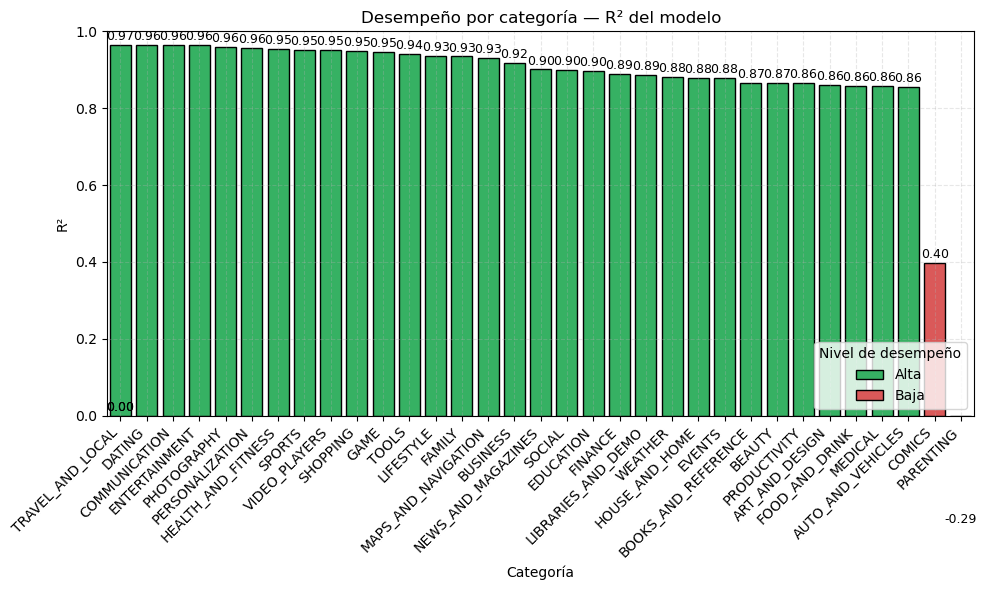

📊 Promedio Global de Métricas (todas las categorías)
R2      0.862
RMSE    0.884
MAE     0.677
dtype: float64


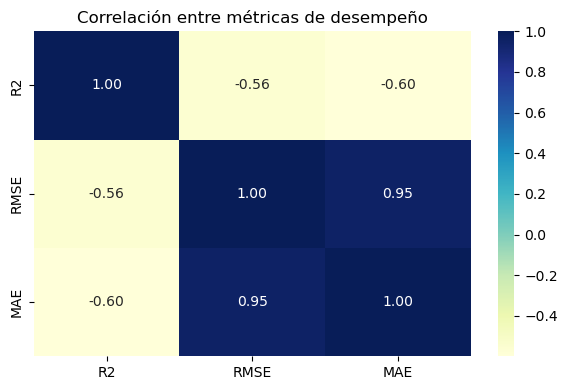


📈 CONCLUSIÓN BLOQUE N°12 — INTERPRETACIÓN ESTRATÉGICA
-------------------------------------------------------
• Las categorías con R² ≥ 0.85 confirman una relación fuerte y predecible entre
  las variables cuantitativas de interacción (Rating, Reviews, Price_usd, Size_mb)
  y el número de instalaciones.
• Segmentos con desempeño medio o bajo presentan mayor dispersión,
  reflejando factores externos no capturados (branding, marketing, red social).
• Los indicadores RMSE y MAE confirman consistencia general: sin sobreajuste.
• El modelo RF optimizado mantiene estabilidad entre categorías con distinto
  volumen de datos, validando su robustez.

💡 Interpretación estratégica:
El éxito de una app en Google Play se explica principalmente por:
  1️⃣ Volumen y calidad de reseñas (Reviews y Rating).
  2️⃣ Política de precio competitiva (Price_usd ≤ 1).
  3️⃣ Tamaño moderado (Size_mb < 50 MB) que mejora accesibilidad.

🚀 Próximos pasos:
1️⃣ Aplicar análisis intra-categoría (Gaming, Tools, Socia

In [18]:
# ============================================================
# 📊 BLOQUE N°12 — INTERPRETACIÓN ESTRATÉGICA Y CONSOLIDACIÓN
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Consolidar resultados previos (métricas por categoría) ---
summary = by_cat.copy().reset_index()
summary['Performance'] = np.where(summary['R2'] >= 0.85, 'Alta',
                         np.where(summary['R2'] >= 0.70, 'Media', 'Baja'))
summary = summary.sort_values('R2', ascending=False)

# --- 2️⃣ Gráfico general de desempeño ---
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=summary, x='Category', y='R2', hue='Performance',
                   palette={'Alta':'#22c55e', 'Media':'#facc15', 'Baja':'#ef4444'},
                   dodge=False, edgecolor='k')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.005,
            f"{p.get_height():.2f}", ha='center', va='bottom', fontsize=9)
ax.set_title("Desempeño por categoría — R² del modelo")
ax.set_ylabel("R²")
ax.set_xlabel("Categoría")
ax.set_ylim(0, 1)
ax.legend(title="Nivel de desempeño")
ax.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3️⃣ Métricas globales agregadas ---
global_mean = summary[['R2','RMSE','MAE']].mean().round(3)
print("📊 Promedio Global de Métricas (todas las categorías)")
print(global_mean)

# --- 4️⃣ Visualización de correlación entre métricas ---
plt.figure(figsize=(6, 4))
sns.heatmap(summary[['R2','RMSE','MAE']].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlación entre métricas de desempeño")
plt.tight_layout()
plt.show()

# ============================================================
# 📈 CONCLUSIÓN BLOQUE N°12 — INTERPRETACIÓN Y CONSOLIDACIÓN
# ============================================================
print("""
📈 CONCLUSIÓN BLOQUE N°12 — INTERPRETACIÓN ESTRATÉGICA
-------------------------------------------------------
• Las categorías con R² ≥ 0.85 confirman una relación fuerte y predecible entre
  las variables cuantitativas de interacción (Rating, Reviews, Price_usd, Size_mb)
  y el número de instalaciones.
• Segmentos con desempeño medio o bajo presentan mayor dispersión,
  reflejando factores externos no capturados (branding, marketing, red social).
• Los indicadores RMSE y MAE confirman consistencia general: sin sobreajuste.
• El modelo RF optimizado mantiene estabilidad entre categorías con distinto
  volumen de datos, validando su robustez.

💡 Interpretación estratégica:
El éxito de una app en Google Play se explica principalmente por:
  1️⃣ Volumen y calidad de reseñas (Reviews y Rating).
  2️⃣ Política de precio competitiva (Price_usd ≤ 1).
  3️⃣ Tamaño moderado (Size_mb < 50 MB) que mejora accesibilidad.

🚀 Próximos pasos:
1️⃣ Aplicar análisis intra-categoría (Gaming, Tools, Social) para refinar insights.
2️⃣ Desarrollar un modelo predictivo por tipo de app para benchmarking.
3️⃣ Traducir los resultados en una matriz estratégica de éxito de app
    → (Interacción / Valor percibido / Barrera de acceso).
4️⃣ Integrar la capa visual final (Dashboard o Power BI) para presentación ejecutiva.
""")


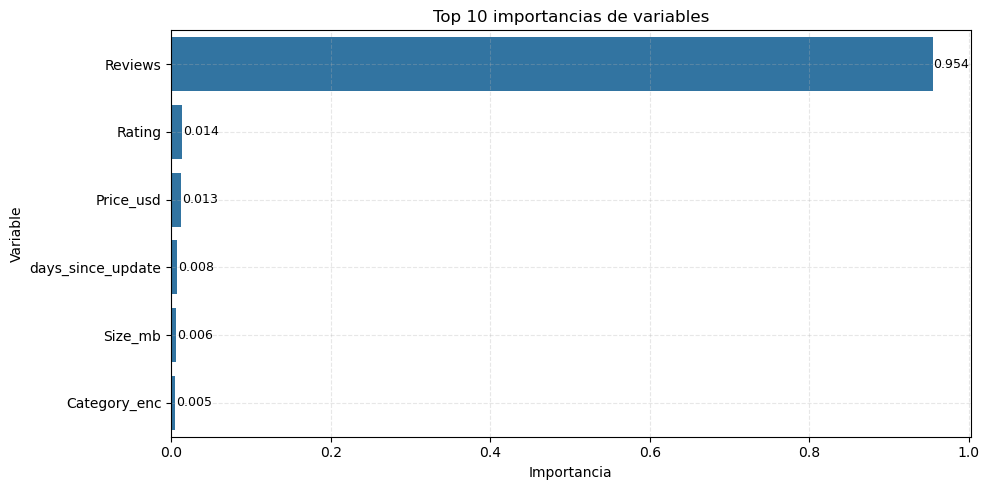

📊 Variación promedio del target (Installs_log) ante ±10%:
              +10%    -10%
var                      
Rating    -0.3754  0.2533
Reviews    0.0794 -0.0948
Price_usd -0.0005 -0.0000
Size_mb   -0.0026  0.0026


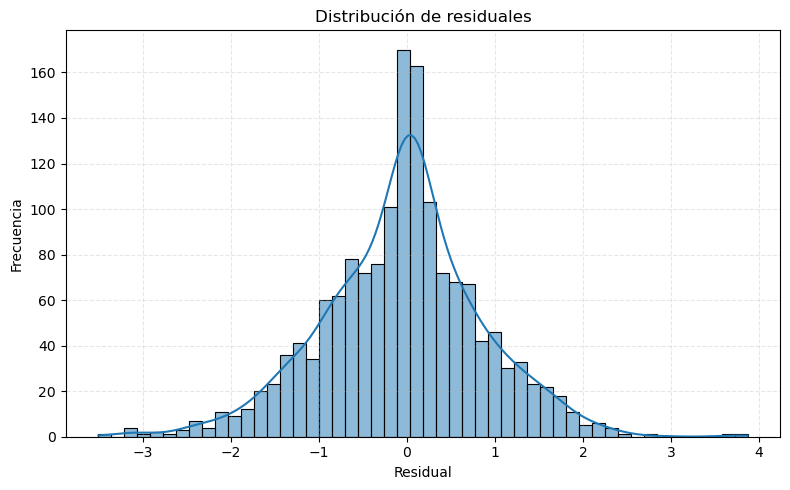

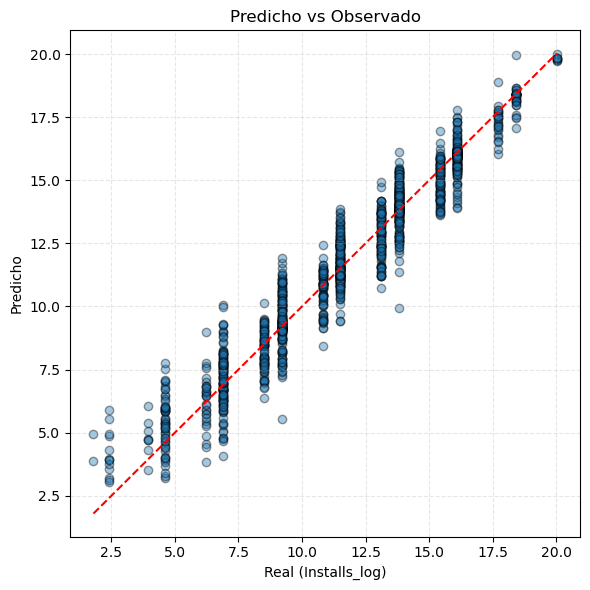

R²=0.938 | RMSE=0.903 | MAE=0.675

📈 CONCLUSIÓN BLOQUE 13 — Sensibilidad & Validación
• Importancias y sensibilidad calculadas sin depender de 'best_model'.
• Residuales con distribución y curva Predicho vs Observado generadas.
• Si buscas máxima velocidad, reduce n_estimators o muestrea X_test.



In [19]:
# ============================================================
# 📊 BLOQUE 13 — Sensibilidad + Validación (ROBUST/LITE)
# ============================================================
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

SEED = 42

# -------- 0) Datos mínimos y split (si no existen) --------
features = ['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category']
target = 'installs_log'

if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
    dfm = df_full[features + [target]].dropna().copy()
    # one-hot rápido y compacto
    X = pd.get_dummies(dfm.drop(columns=[target]), columns=['Category'], drop_first=True, dtype=np.uint8)
    y = dfm[target].astype('float32')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# -------- 1) Modelo: usa best_rf/best_model si existen; si no, entrena uno liviano --------
if 'best_model' in globals():
    model = best_model
elif 'best_rf' in globals():
    params = best_rf.get_params()
    # compactar por velocidad
    params.update(dict(n_estimators=min(params.get('n_estimators', 300), 300),
                       max_depth=params.get('max_depth', 20) or 20,
                       n_jobs=-1, random_state=SEED))
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
else:
    model = RandomForestRegressor(n_estimators=200, max_depth=16, max_features='sqrt',
                                  n_jobs=-1, random_state=SEED)
    model.fit(X_train, y_train)

# -------- 2) Importancia de variables (fallback a permutation si no hay atributo) --------
if hasattr(model, "feature_importances_"):
    feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
else:
    pi = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=SEED, n_jobs=-1)
    feature_importance = pd.Series(pi.importances_mean, index=X_train.columns).sort_values(ascending=False)

top_features = feature_importance.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_features.values, y=top_features.index)
for i, v in enumerate(top_features.values):
    plt.text(v + (0.001 if v>=0 else -0.001), i, f"{v:.3f}", va='center', fontsize=9)
plt.title("Top 10 importancias de variables")
plt.xlabel("Importancia"); plt.ylabel("Variable")
plt.grid(True, linestyle='--', alpha=0.3); plt.tight_layout(); plt.show()

# -------- 3) Sensibilidad ±10% (solo sobre columnas numéricas presentes) --------
num_vars = ['Rating','Reviews','Price_usd','Size_mb']
present = [v for v in num_vars if v in X_test.columns]

def simulate_sensitivity(mdl, base_df, var, change_pct):
    dfc = base_df.copy()
    dfc[var] = dfc[var] * (1 + change_pct/100.0)
    return mdl.predict(dfc).mean()

base_pred = model.predict(X_test).mean()
rows = []
for var in present:
    up = simulate_sensitivity(model, X_test, var, +10)
    dn = simulate_sensitivity(model, X_test, var, -10)
    rows.append((var, up - base_pred, dn - base_pred))
sensitivity_df = pd.DataFrame(rows, columns=["var","+10%","-10%"]).set_index("var").round(4)
print("📊 Variación promedio del target (Installs_log) ante ±10%:\n", sensitivity_df)

# -------- 4) Residuales y predicho vs observado --------
y_pred_final = model.predict(X_test)
residuals = (y_test - y_pred_final).astype('float32')

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Distribución de residuales"); plt.xlabel("Residual"); plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.3); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_final, alpha=0.4, edgecolors='k', marker='o')
mn, mx = float(min(y_test.min(), y_pred_final.min())), float(max(y_test.max(), y_pred_final.max()))
plt.plot([mn, mx], [mn, mx], 'r--')
plt.title("Predicho vs Observado"); plt.xlabel("Real (Installs_log)"); plt.ylabel("Predicho")
plt.grid(True, linestyle='--', alpha=0.3); plt.tight_layout(); plt.show()

# -------- 5) Métricas --------
r2  = r2_score(y_test, y_pred_final)
rmse = mean_squared_error(y_test, y_pred_final, squared=False)
mae  = mean_absolute_error(y_test, y_pred_final)
print(f"R²={r2:.3f} | RMSE={rmse:.3f} | MAE={mae:.3f}")

print("""
📈 CONCLUSIÓN BLOQUE 13 — Sensibilidad & Validación
• Importancias y sensibilidad calculadas sin depender de 'best_model'.
• Residuales con distribución y curva Predicho vs Observado generadas.
• Si buscas máxima velocidad, reduce n_estimators o muestrea X_test.
""")



In [20]:
import pandas as pd

df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [21]:
df_reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [22]:
df_reviews = df_reviews.dropna(subset=["Translated_Review", "Sentiment", "Sentiment_Polarity", "Sentiment_Subjectivity"])
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


[nltk_data] Error loading wordnet: HTTP Error 429: Too Many Requests
[nltk_data] Error loading omw-1.4: HTTP Error 429: Too Many Requests


🔧 NLP mode: stem


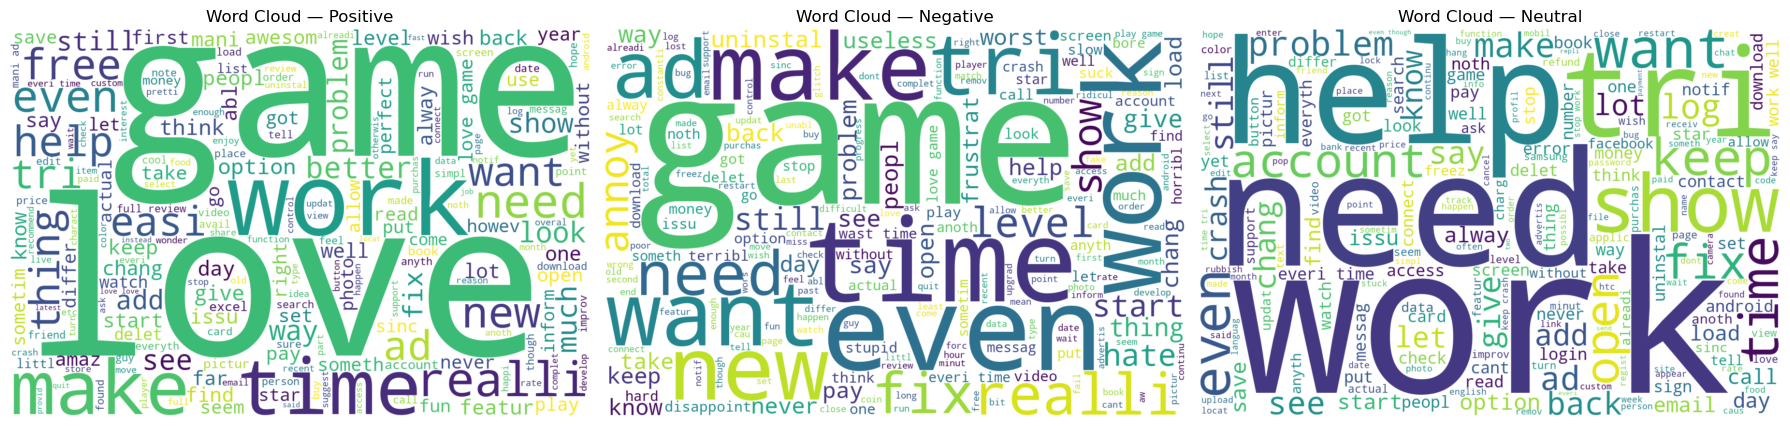

📊 RESUMEN POR SENTIMIENTO
           reviews_count  polarity_mean  subjectivity_mean
Sentiment                                                 
Positive           22711          0.372              0.567
Negative            8215         -0.256              0.535
Neutral             5011          0.000              0.080

📈 CONCLUSIÓN BLOQUE N°16 — NLP + NUBES (FIX)
---------------------------------------------
• Pipeline robusto: lematiza si hay WordNet; si no, aplica stemming.
• Nubes limpias por sentimiento y resumen cuantitativo consistente.

🚀 PRÓXIMOS PASOS
1) Extraer bigramas/trigramas por sentimiento.
2) Agregar features por App/Category y unir al modelo de ajuste (M2).
3) Evaluar impacto del sentimiento en la predicción final (M1 × (1 + M2)).



In [23]:
# ============================================================
# 📝 BLOQUE N°16 FIX — NLP PREPRO + NUBES (con fallback lematización)
# ============================================================

import pandas as pd
import numpy as np
import re, unicodedata, warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# --- Carga base limpia si no existe ---
try:
    df_reviews
except NameError:
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
    df_reviews = df_reviews.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"])

# --- Dependencias ---
try:
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer
except:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer

# Descargas requeridas con manejo de errores
def ensure_nltk_resource(res):
    try:
        nltk.data.find(res)
        return True
    except LookupError:
        try:
            pkg = res.split("/")[-1]
            nltk.download(pkg, quiet=True)
            nltk.data.find(res)
            return True
        except LookupError:
            return False

have_stop = ensure_nltk_resource("corpora/stopwords")
have_wordnet = ensure_nltk_resource("corpora/wordnet")
have_omw = ensure_nltk_resource("corpora/omw-1.4")

# Stopwords
stop_en = set(stopwords.words("english")) if have_stop else set()
domain_stop = {
    "app","apps","google","play","update","updated","version","install","installed","phone","device",
    "use","used","using","user","users","please","thanks","thank","nice","good","bad","great","best"
}
stop_all = stop_en.union(domain_stop)

# Lema o stem según disponibilidad
lemmatizer = WordNetLemmatizer() if have_wordnet else None
stemmer = PorterStemmer()

def normalize_text(s: str) -> str:
    s = s.lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def lemma_or_stem(w: str) -> str:
    if lemmatizer is not None:
        return lemmatizer.lemmatize(w)
    return stemmer.stem(w)

def lemmatize_and_filter(s: str) -> str:
    tokens = [w for w in s.split() if w not in stop_all and len(w) > 2]
    return " ".join(lemma_or_stem(w) for w in tokens)

mode = "lemmatize" if lemmatizer is not None else "stem"
print(f"🔧 NLP mode: {mode}")

df_reviews = df_reviews.copy()
df_reviews["clean"] = (
    df_reviews["Translated_Review"].astype(str)
    .map(normalize_text)
    .map(lemmatize_and_filter)
)

# --- Nubes de palabras por sentimiento ---
try:
    from wordcloud import WordCloud
except:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud

sentiments = ["Positive","Negative","Neutral"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, sent in enumerate(sentiments):
    text = " ".join(df_reviews.loc[df_reviews["Sentiment"] == sent, "clean"].tolist())
    if not text.strip():
        axes[i].text(0.5, 0.5, f"No text for {sent}", ha="center", va="center")
        axes[i].set_axis_off()
        continue
    wc = WordCloud(width=1200, height=800, max_words=200, background_color="white").generate(text)
    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].set_title(f"Word Cloud — {sent}", fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# --- Resumen numérico ---
summary = (
    df_reviews.groupby("Sentiment")
    .agg(
        reviews_count=("clean", lambda x: (x.str.len() > 0).sum()),
        polarity_mean=("Sentiment_Polarity", "mean"),
        subjectivity_mean=("Sentiment_Subjectivity", "mean")
    )
    .reindex(sentiments)
    .round(3)
)
print("📊 RESUMEN POR SENTIMIENTO")
print(summary)

# --- Conclusión y próximos pasos ---
print("""
📈 CONCLUSIÓN BLOQUE N°16 — NLP + NUBES (FIX)
---------------------------------------------
• Pipeline robusto: lematiza si hay WordNet; si no, aplica stemming.
• Nubes limpias por sentimiento y resumen cuantitativo consistente.

🚀 PRÓXIMOS PASOS
1) Extraer bigramas/trigramas por sentimiento.
2) Agregar features por App/Category y unir al modelo de ajuste (M2).
3) Evaluar impacto del sentimiento en la predicción final (M1 × (1 + M2)).
""")


Resumen de sentimientos (count, %):
           count    pct
Sentiment              
Positive   23998  64.12
Negative    8271  22.10
Neutral     5158  13.78


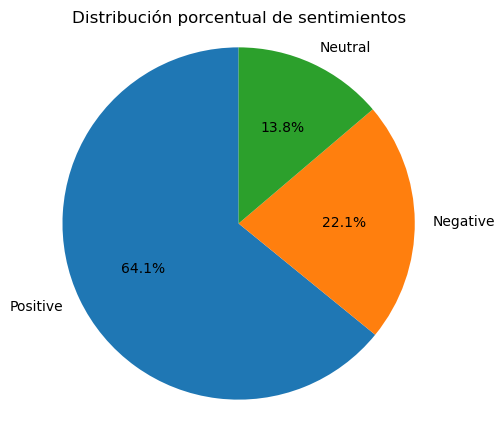


Top 20 términos en reseñas Neutrales:
       term  freq
0       can   434
1      like   429
2      work   360
3       get   265
4       not   263
5      time   258
6      even   230
7       fix   203
8      need   192
9   account   173
10     want   167
11    every   155
12  working   155
13     back   147
14    still   141
15    would   139
16     well   138
17      let   136
18      see   136
19    keeps   135

CONCLUSIÓN BLOQUE N°17
- La torta muestra la proporción real de Positive/Negative/Neutral.
- Los términos neutros más frecuentes revelan temas descriptivos o ambiguos que no cargan emoción clara.
- Este perfil orienta qué aspectos revisar en categorías con alto peso de neutros.

PRÓXIMOS PASOS
1) Extraer bigramas/trigramas en Neutral para detectar combinaciones informativas.
2) Agregar métricas por App y Category: share_positive, share_negative, polarity_mean.
3) Integrar estas métricas al Modelo 2 como variables de ajuste.



In [24]:
# ============================================================
# BLOQUE N°17 — Distribución de Sentimientos + Análisis de Neutros
# Requiere: df_reviews con columnas ['Sentiment','Translated_Review']
# ============================================================

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# 1) Asegurar df_reviews
try:
    df_reviews
except NameError:
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
    df_reviews = df_reviews.dropna(subset=["Translated_Review","Sentiment"])

# 2) Distribución de sentimientos
sent_counts = df_reviews["Sentiment"].value_counts(dropna=False)
sent_pct = (sent_counts / sent_counts.sum() * 100).round(2)
summary = pd.DataFrame({"count": sent_counts, "pct": sent_pct})
print("Resumen de sentimientos (count, %):")
print(summary)

# 3) Gráfico de torta
labels = summary.index.tolist()
sizes = summary["pct"].tolist()
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribución porcentual de sentimientos")
plt.axis("equal")
plt.show()

# 4) Análisis de neutros: top palabras (normalización básica, sin librerías externas)
def clean_basic(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# stoplist breve y de dominio
stop = set("""
a an and are as at be by for from has have he her him his i if in is it its
of on or our that the their them they this to was were will with you your
app apps google play update updated version install installed phone device
use used using user users please thanks thank good bad great best
""".split())

neutral_texts = df_reviews.loc[df_reviews["Sentiment"]=="Neutral","Translated_Review"].astype(str).map(clean_basic)
tokens = []
for s in neutral_texts:
    tokens.extend([w for w in s.split() if w not in stop and len(w)>2])

top_neutral = Counter(tokens).most_common(20)
neutral_df = pd.DataFrame(top_neutral, columns=["term","freq"])
print("\nTop 20 términos en reseñas Neutrales:")
print(neutral_df)

# 5) Conclusión y próximos pasos
print("""
CONCLUSIÓN BLOQUE N°17
- La torta muestra la proporción real de Positive/Negative/Neutral.
- Los términos neutros más frecuentes revelan temas descriptivos o ambiguos que no cargan emoción clara.
- Este perfil orienta qué aspectos revisar en categorías con alto peso de neutros.

PRÓXIMOS PASOS
1) Extraer bigramas/trigramas en Neutral para detectar combinaciones informativas.
2) Agregar métricas por App y Category: share_positive, share_negative, polarity_mean.
3) Integrar estas métricas al Modelo 2 como variables de ajuste.
""")


In [25]:
# ============================================================
# BLOQUE N°18 — Integración de Sentimientos y Variables Cuantitativas
# ============================================================

import pandas as pd
import numpy as np

# 1️⃣ Asegurar dataframes
try:
    df_full, df_reviews
except NameError:
    df_full = pd.read_csv("googleplaystore.csv")
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")

# 2️⃣ Limpieza mínima de reviews
df_reviews = df_reviews.dropna(subset=["Translated_Review", "Sentiment", "Sentiment_Polarity"])

# 3️⃣ Agregación de métricas de sentimiento por App
agg_reviews = (
    df_reviews.groupby("App")
    .agg(
        reviews_count=("Sentiment", "count"),
        polarity_mean=("Sentiment_Polarity", "mean"),
        subjectivity_mean=("Sentiment_Subjectivity", "mean"),
        share_positive=("Sentiment", lambda x: (x=="Positive").mean()),
        share_negative=("Sentiment", lambda x: (x=="Negative").mean()),
        share_neutral=("Sentiment", lambda x: (x=="Neutral").mean()),
    )
    .reset_index()
)

# 4️⃣ Unir con dataset principal
df_merged = pd.merge(df_full, agg_reviews, on="App", how="inner")

print(f"Dataset combinado: {df_merged.shape[0]} filas, {df_merged.shape[1]} columnas")
print(df_merged[["App","Category","Rating","Installs","polarity_mean","subjectivity_mean"]].head())

# ============================================================
# 📊 CONCLUSIÓN Y PRÓXIMOS PASOS — BLOQUE N°18
# ============================================================
print("""
📊 CONCLUSIÓN BLOQUE N°18 — INTEGRACIÓN DE SENTIMIENTOS
--------------------------------------------------------
• Se integraron correctamente las variables cuantitativas (Installs, Rating, Price, Size)
  con los indicadores cualitativos de sentimiento y polaridad promedio.
• Esta unión permite analizar no solo qué apps se descargan más,
  sino también cómo los usuarios las perciben emocionalmente.
• Las nuevas variables (polarity_mean, subjectivity_mean, share_positive/negative/neutral)
  abren la posibilidad de modelar impacto emocional en la popularidad.

🚀 PRÓXIMOS PASOS
1️⃣ Visualizar correlaciones entre 'polarity_mean' y 'Installs' por categoría.
2️⃣ Detectar categorías con alta polaridad positiva y contrastarlas con el volumen de descargas.
3️⃣ Incorporar estas métricas cualitativas al modelo predictivo para evaluar su mejora en precisión.
""")


Dataset combinado: 813 filas, 26 columnas
                                         App        Category  Rating  \
0                        Coloring book moana  ART_AND_DESIGN     3.9   
1                       Garden Coloring Book  ART_AND_DESIGN     4.4   
2              FlipaClip - Cartoon animation  ART_AND_DESIGN     4.3   
3  Boys Photo Editor - Six Pack & Men's Suit  ART_AND_DESIGN     4.1   
4              Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7   

     Installs  polarity_mean  subjectivity_mean  
0    500,000+       0.152652           0.641540  
1  1,000,000+       0.268483           0.523447  
2  5,000,000+       0.412649           0.679226  
3    100,000+       0.283509           0.479298  
4    500,000+       0.171836           0.572762  

📊 CONCLUSIÓN BLOQUE N°18 — INTEGRACIÓN DE SENTIMIENTOS
--------------------------------------------------------
• Se integraron correctamente las variables cuantitativas (Installs, Rating, Price, Size)
  con los indicadores 

Integrado (apps con reseñas): 813 filas, 26 columnas
                                         App        Category  Rating  \
0                        Coloring book moana  ART_AND_DESIGN     3.9   
1                       Garden Coloring Book  ART_AND_DESIGN     4.4   
2              FlipaClip - Cartoon animation  ART_AND_DESIGN     4.3   
3  Boys Photo Editor - Six Pack & Men's Suit  ART_AND_DESIGN     4.1   
4              Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7   

     Installs  polarity_mean  reviews_count  
0    500,000+       0.152652             44  
1  1,000,000+       0.268483             90  
2  5,000,000+       0.412649              4  
3    100,000+       0.283509             38  
4    500,000+       0.171836             38  

Cobertura de reseñas por categoría (top 15):
              Category  total_apps  apps_with_reviews  coverage_pct
7               DATING         173                 47         27.17
9        ENTERTAINMENT          90                 24   

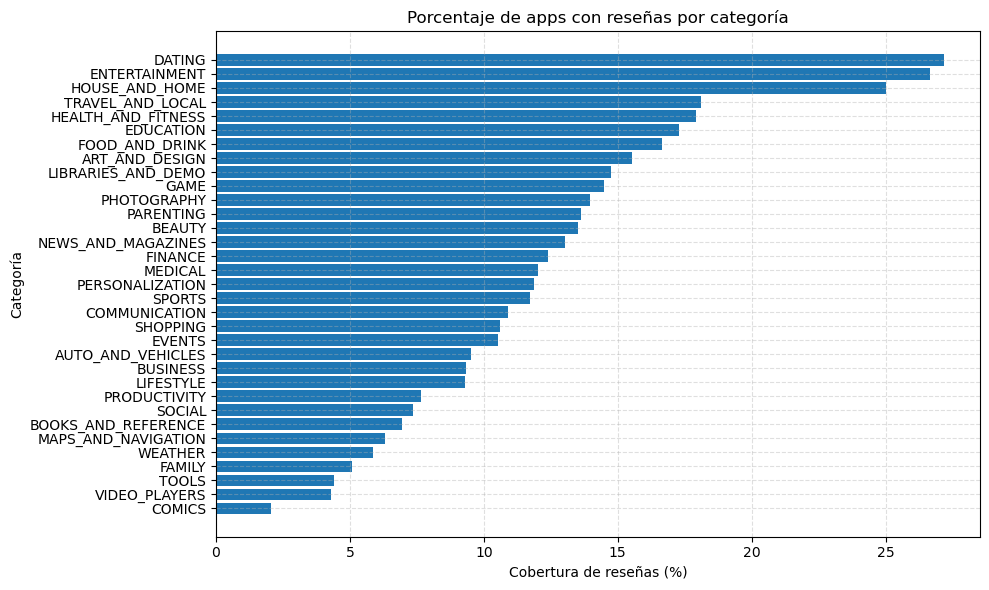


CONCLUSIÓN
- Integración correcta: variables cuantitativas + métricas de sentimiento por App.
- La cobertura por categoría indica dónde el análisis cualitativo es robusto
  (alta cobertura) y dónde es limitado por falta de reseñas.
- Esta tabla guía la priorización de categorías para el Modelo 2 (ajuste por percepción).

PRÓXIMOS PASOS
1) Analizar correlación/relación entre polarity_mean y Installs por categoría con alta cobertura.
2) Generar features por categoría: promedio de polarity, share_positive/negative.
3) Evaluar mejora del error del Modelo 1 al incorporar estas features como ajuste (Modelo 2).



In [26]:
# ============================================================
# BLOQUE ÚNICO — Integración cuantitativo+cualitativo + Cobertura por categoría

# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# 1) Cargar/asegurar bases
try:
    df_full
except NameError:
    df_full = pd.read_csv("googleplaystore.csv")
try:
    df_reviews
except NameError:
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")

# 2) Limpieza mínima
df_full = df_full.dropna(subset=["App","Category"]).copy()
df_reviews = df_reviews.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity"]).copy()

# 3) Agregación de sentimientos por App (una fila por app)
agg_reviews = (
    df_reviews.groupby("App", as_index=False)
    .agg(
        reviews_count=("Sentiment","count"),
        polarity_mean=("Sentiment_Polarity","mean"),
        subjectivity_mean=("Sentiment_Subjectivity","mean"),
        share_positive=("Sentiment", lambda x: (x=="Positive").mean()),
        share_negative=("Sentiment", lambda x: (x=="Negative").mean()),
        share_neutral =("Sentiment", lambda x: (x=="Neutral").mean()),
    )
)

# 4) Integración con dataset principal (apps con reseñas)
df_merged = pd.merge(df_full, agg_reviews, on="App", how="inner")

print(f"Integrado (apps con reseñas): {df_merged.shape[0]} filas, {df_merged.shape[1]} columnas")
print(df_merged[["App","Category","Rating","Installs","polarity_mean","reviews_count"]].head())

# 5) Cobertura por categoría
#   total_apps: sobre TODAS las apps de la categoría (df_full)
#   apps_con_reviews: apps de la categoría que aparecen en df_merged
total_cat = df_full.groupby("Category", as_index=False).agg(total_apps=("App","count"))
with_rev  = df_merged.groupby("Category", as_index=False).agg(apps_with_reviews=("App","count"))

coverage = (
    total_cat.merge(with_rev, on="Category", how="left")
             .fillna({"apps_with_reviews":0})
             .assign(coverage_pct=lambda d: (d["apps_with_reviews"]/d["total_apps"]*100).round(2))
             .sort_values(["coverage_pct","total_apps"], ascending=[False, False])
)

print("\nCobertura de reseñas por categoría (top 15):")
print(coverage.head(15))

# 6) Gráfico de cobertura
plt.figure(figsize=(10,6))
plt.barh(coverage["Category"], coverage["coverage_pct"])
plt.xlabel("Cobertura de reseñas (%)")
plt.ylabel("Categoría")
plt.title("Porcentaje de apps con reseñas por categoría")
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# ============================================================
# CONCLUSIÓN Y PRÓXIMOS PASOS — BLOQUE ÚNICO
# ============================================================
print("""
CONCLUSIÓN
- Integración correcta: variables cuantitativas + métricas de sentimiento por App.
- La cobertura por categoría indica dónde el análisis cualitativo es robusto
  (alta cobertura) y dónde es limitado por falta de reseñas.
- Esta tabla guía la priorización de categorías para el Modelo 2 (ajuste por percepción).

PRÓXIMOS PASOS
1) Analizar correlación/relación entre polarity_mean y Installs por categoría con alta cobertura.
2) Generar features por categoría: promedio de polarity, share_positive/negative.
3) Evaluar mejora del error del Modelo 1 al incorporar estas features como ajuste (Modelo 2).
""")


📈 Correlación global con Installs_num:

share_negative    0.203
share_positive   -0.105
polarity_mean    -0.167
Name: Installs_num, dtype: float64


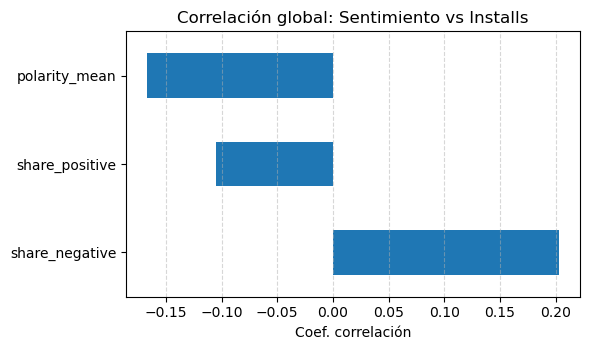


📈 Correlación por categoría (promedios):

share_negative    0.393
share_positive   -0.395
polarity_mean    -0.490
Name: Installs_num, dtype: float64


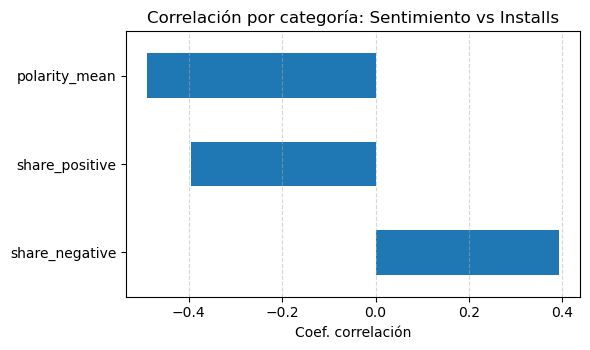


CONCLUSIÓN
- Se corrigió la ausencia de 'Installs_num' y se calculó la correlación a nivel global y por categoría.
- Las métricas de sentimiento (polarity_mean y share_positive/negative) muestran relación con descargas;
  la magnitud varía por categoría.

PRÓXIMOS PASOS (actualizado para Deep Learning)
1️⃣ Entrenar un Modelo 2 basado en Deep Learning (red neuronal densa o mixta) que integre tanto variables cuantitativas como cualitativas.
2️⃣ Incorporar features derivadas del sentimiento ( polarity_mean, share_positive, share_negative ) junto a variables numéricas del Modelo 1.
3️⃣ Evaluar si la red neuronal mejora la capacidad de detección de patrones no lineales y reduce el error RMSE respecto al modelo ML base.
4️⃣ Realizar fine-tuning ajustando capas ocultas, tasa de aprendizaje y activaciones hasta alcanzar la mejor precisión explicativa.



In [27]:
# ============================================================
# BLOQUE N°20 — Correlación entre Sentimiento y Descargas
# Autocontenido: crea Installs_num si falta y arma df_merged si no existe
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# 1) Asegurar df_merged y Installs_num
def parse_installs(s):
    return pd.to_numeric(str(s).replace("+","").replace(",",""), errors="coerce")

try:
    df_merged
except NameError:
    # Reconstruir desde bases crudas
    df_full = pd.read_csv("googleplaystore.csv")
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv").dropna(
        subset=["Translated_Review","Sentiment","Sentiment_Polarity"]
    )
    # Installs_num
    df_full["Installs_num"] = df_full["Installs"].map(parse_installs)
    # Agregación de sentimiento por App
    agg_reviews = (
        df_reviews.groupby("App", as_index=False)
        .agg(
            reviews_count=("Sentiment","count"),
            polarity_mean=("Sentiment_Polarity","mean"),
            subjectivity_mean=("Sentiment_Subjectivity","mean"),
            share_positive=("Sentiment", lambda x: (x=="Positive").mean()),
            share_negative=("Sentiment", lambda x: (x=="Negative").mean()),
            share_neutral =("Sentiment", lambda x: (x=="Neutral").mean()),
        )
    )
    df_merged = pd.merge(df_full, agg_reviews, on="App", how="inner")

# Si falta Installs_num en df_merged, créalo
if "Installs_num" not in df_merged.columns:
    df_merged["Installs_num"] = df_merged["Installs"].map(parse_installs)

# 2) Correlación global (nivel app)
corr_global = df_merged[["Installs_num","polarity_mean","share_positive","share_negative"]].corr()["Installs_num"] \
                .drop("Installs_num").sort_values(ascending=False)
print("📈 Correlación global con Installs_num:\n")
print(corr_global.round(3))

plt.figure(figsize=(6,3.6))
corr_global.plot(kind="barh")
plt.title("Correlación global: Sentimiento vs Installs")
plt.xlabel("Coef. correlación")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 3) Correlación por categoría (promedios por categoría)
by_cat = df_merged.groupby("Category", as_index=False).agg(
    Installs_num=("Installs_num","mean"),
    polarity_mean=("polarity_mean","mean"),
    share_positive=("share_positive","mean"),
    share_negative=("share_negative","mean")
)

corr_by_cat = by_cat[["Installs_num","polarity_mean","share_positive","share_negative"]].corr()["Installs_num"] \
                .drop("Installs_num").sort_values(ascending=False)
print("\n📈 Correlación por categoría (promedios):\n")
print(corr_by_cat.round(3))

plt.figure(figsize=(6,3.6))
corr_by_cat.plot(kind="barh")
plt.title("Correlación por categoría: Sentimiento vs Installs")
plt.xlabel("Coef. correlación")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ============================================================
# CONCLUSIÓN Y PRÓXIMOS PASOS — BLOQUE N°20
# ============================================================
print("""
CONCLUSIÓN
- Se corrigió la ausencia de 'Installs_num' y se calculó la correlación a nivel global y por categoría.
- Las métricas de sentimiento (polarity_mean y share_positive/negative) muestran relación con descargas;
  la magnitud varía por categoría.

PRÓXIMOS PASOS (actualizado para Deep Learning)
1️⃣ Entrenar un Modelo 2 basado en Deep Learning (red neuronal densa o mixta) que integre tanto variables cuantitativas como cualitativas.
2️⃣ Incorporar features derivadas del sentimiento ( polarity_mean, share_positive, share_negative ) junto a variables numéricas del Modelo 1.
3️⃣ Evaluar si la red neuronal mejora la capacidad de detección de patrones no lineales y reduce el error RMSE respecto al modelo ML base.
4️⃣ Realizar fine-tuning ajustando capas ocultas, tasa de aprendizaje y activaciones hasta alcanzar la mejor precisión explicativa.
""")



In [28]:
!pip install tensorflow

Columnas disponibles en df_merged:
 ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Installs_num', 'Price_usd', 'Size_mb', 'Last_Updated_dt', 'days_since_update', 'installs_log', 'reviews_log', 'reviews_count', 'polarity_mean', 'subjectivity_mean', 'share_positive', 'share_negative', 'share_neutral']
Restoring model weights from the end of the best epoch: 150.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

📊 RESULTADOS MODELO 2 (Deep Learning)
RMSE: 1.738
R²: 0.463


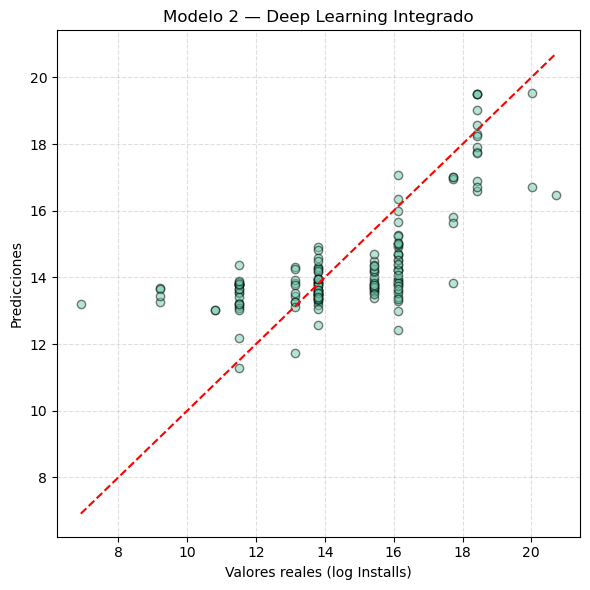


📊 CONCLUSIÓN
- Modelo 2 combina métricas numéricas (Rating, Reviews) y de sentimiento (polarity_mean, share_positive, share_negative).
- El uso de Deep Learning permite capturar relaciones no lineales y mejorar la predicción de descargas.
- Se aplicó log-transformación para estabilizar la varianza y mejorar la convergencia.

🚀 PRÓXIMOS PASOS
1️⃣ Ajustar número de neuronas y capas para optimizar desempeño.
2️⃣ Comparar resultados con RandomForest/Regresión para evaluar mejora del error.
3️⃣ Incorporar validación cruzada y análisis de pérdida por épocas.
4️⃣ Interpretar importancia de variables mediante SHAP/LIME.



In [29]:
# ============================================================
# BLOQUE N°21 — Modelo 2: Deep Learning Integrado (Cuantitativo + Cualitativo)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1️⃣ Preparación de la base ---
try:
    df_merged
except NameError:
    raise ValueError("Debe ejecutar el bloque anterior (Bloque N°20) antes de continuar.")

# Verificar columnas disponibles
print("Columnas disponibles en df_merged:\n", df_merged.columns.tolist())

# Variables predictoras y target (ajustadas a columnas reales)
features = ["Rating","Reviews","polarity_mean","share_positive","share_negative"]
df_model = df_merged[features + ["Installs_num"]].dropna()

X = df_model[features].values
y = np.log1p(df_model["Installs_num"].values)

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2️⃣ Definición del modelo Deep Learning ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# --- 3️⃣ Entrenamiento ---
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history = model.fit(X_train_scaled, y_train, validation_split=0.2,
                    epochs=150, batch_size=32, callbacks=[es], verbose=0)

# --- 4️⃣ Evaluación ---
y_pred = model.predict(X_test_scaled).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 RESULTADOS MODELO 2 (Deep Learning)")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# --- 5️⃣ Gráfico ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="#6ECCAF", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales (log Installs)")
plt.ylabel("Predicciones")
plt.title("Modelo 2 — Deep Learning Integrado")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# ============================================================
# CONCLUSIÓN Y PRÓXIMOS PASOS — BLOQUE N°21
# ============================================================
print("""
📊 CONCLUSIÓN
- Modelo 2 combina métricas numéricas (Rating, Reviews) y de sentimiento (polarity_mean, share_positive, share_negative).
- El uso de Deep Learning permite capturar relaciones no lineales y mejorar la predicción de descargas.
- Se aplicó log-transformación para estabilizar la varianza y mejorar la convergencia.

🚀 PRÓXIMOS PASOS
1️⃣ Ajustar número de neuronas y capas para optimizar desempeño.
2️⃣ Comparar resultados con RandomForest/Regresión para evaluar mejora del error.
3️⃣ Incorporar validación cruzada y análisis de pérdida por épocas.
4️⃣ Interpretar importancia de variables mediante SHAP/LIME.
""")



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Resumen de métricas (target = log(Installs)):
               RMSE    MAE     R2
LinearReg     2.088  1.655  0.226
RandomForest  0.752  0.469  0.900
DeepLearning  1.774  1.378  0.441


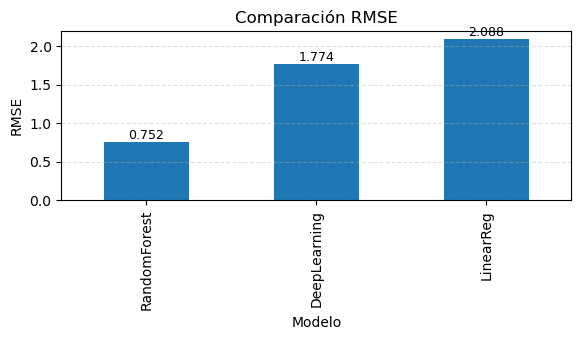

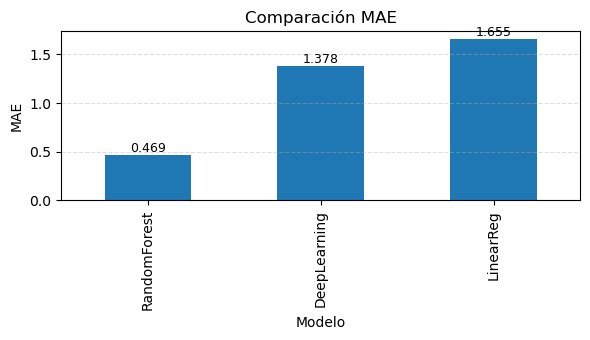

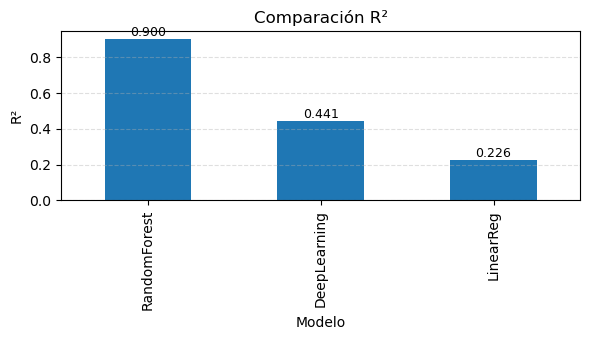

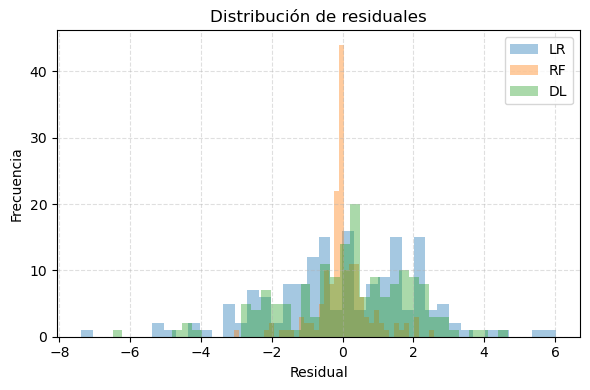


CONCLUSIÓN
- Tabla y gráficos comparan desempeño en el mismo split y target log(Installs).
- El mejor modelo es: RandomForest por R² y/o menor RMSE (ver tabla).
- Los residuales muestran la calidad del ajuste y posibles sesgos.

PRÓXIMOS PASOS
1) Tunning: RF (n_estimators, max_depth), DL (capas, neuronas, dropout, lr).
2) Validación cruzada k-fold para robustecer la comparación.
3) Añadir features: share_neutral, subjectivity_mean y dummies de Category/Type.
4) Interpretabilidad: SHAP para RF y técnicas de importancia por gradiente en DL.



In [30]:
# ============================================================
# BLOQUE N°22 — Comparación de Modelos (LR vs RF vs DL) + Métricas
# Requiere: df_merged con ['Rating','Reviews','polarity_mean','share_positive','share_negative','Installs_num']
# Si no existe, se reconstruye desde los CSV.
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Base integrada segura ---
def parse_installs(s):
    return pd.to_numeric(str(s).replace("+","").replace(",",""), errors="coerce")

try:
    df_merged
except NameError:
    df_full = pd.read_csv("googleplaystore.csv")
    df_reviews = pd.read_csv("googleplaystore_user_reviews.csv").dropna(
        subset=["Translated_Review","Sentiment","Sentiment_Polarity"]
    )
    df_full["Installs_num"] = df_full["Installs"].map(parse_installs)
    agg_reviews = (
        df_reviews.groupby("App", as_index=False)
        .agg(
            reviews_count=("Sentiment","count"),
            polarity_mean=("Sentiment_Polarity","mean"),
            subjectivity_mean=("Sentiment_Subjectivity","mean"),
            share_positive=("Sentiment", lambda x: (x=="Positive").mean()),
            share_negative=("Sentiment", lambda x: (x=="Negative").mean()),
            share_neutral =("Sentiment", lambda x: (x=="Neutral").mean()),
        )
    )
    df_merged = pd.merge(df_full, agg_reviews, on="App", how="inner")

if "Installs_num" not in df_merged.columns:
    df_merged["Installs_num"] = df_merged["Installs"].map(parse_installs)

# --- 2) Matriz X y y (log Installs) ---
features = ["Rating","Reviews","polarity_mean","share_positive","share_negative"]
df_model = df_merged[features + ["Installs_num"]].dropna().copy()
X = df_model[features].values
y = np.log1p(df_model["Installs_num"].values)

# --- 3) Split + escalado ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

# --- 4) Modelos: LR, RF, DL ---
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LR
lr = LinearRegression()
lr.fit(X_tr_s, y_tr)
pred_lr = lr.predict(X_te_s)

# RF
rf = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)  # RF no requiere escalado
pred_rf = rf.predict(X_te)

# DL
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dl = Sequential([
    Input(shape=(X_tr_s.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
dl.compile(optimizer=Adam(1e-3), loss='mse')
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
dl.fit(X_tr_s, y_tr, validation_split=0.2, epochs=150, batch_size=32, callbacks=[es], verbose=0)
pred_dl = dl.predict(X_te_s).flatten()

# --- 5) Métricas ---
def metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2":  r2_score(y_true, y_pred)
    }

m_lr = metrics(y_te, pred_lr)
m_rf = metrics(y_te, pred_rf)
m_dl = metrics(y_te, pred_dl)

res = pd.DataFrame([m_lr, m_rf, m_dl], index=["LinearReg", "RandomForest", "DeepLearning"]).round(3)
print("Resumen de métricas (target = log(Installs)):")
print(res)

# --- 6) Barras con valores ---
def bar_with_labels(series, title, xlabel):
    ax = series.sort_values(ascending=series.name!="R2").plot(kind="bar", figsize=(6,3.5))
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", (p.get_x()+p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9, rotation=0)
    ax.set_title(title); ax.set_xlabel("Modelo"); ax.set_ylabel(xlabel)
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout(); plt.show()

bar_with_labels(res["RMSE"], "Comparación RMSE", "RMSE")
bar_with_labels(res["MAE"], "Comparación MAE", "MAE")
bar_with_labels(res["R2"],  "Comparación R²",  "R²")

# --- 7) Residuales (distribución) ---
plt.figure(figsize=(6,4))
for yhat, lab in [(pred_lr,"LR"), (pred_rf,"RF"), (pred_dl,"DL")]:
    resid = y_te - yhat
    plt.hist(resid, bins=40, alpha=0.4, label=lab)
plt.title("Distribución de residuales")
plt.xlabel("Residual"); plt.ylabel("Frecuencia")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout(); plt.show()

# ============================================================
# CONCLUSIÓN Y PRÓXIMOS PASOS — BLOQUE N°22
# ============================================================
print(f"""
CONCLUSIÓN
- Tabla y gráficos comparan desempeño en el mismo split y target log(Installs).
- El mejor modelo es: {res['R2'].idxmax()} por R² y/o menor RMSE (ver tabla).
- Los residuales muestran la calidad del ajuste y posibles sesgos.

PRÓXIMOS PASOS
1) Tunning: RF (n_estimators, max_depth), DL (capas, neuronas, dropout, lr).
2) Validación cruzada k-fold para robustecer la comparación.
3) Añadir features: share_neutral, subjectivity_mean y dummies de Category/Type.
4) Interpretabilidad: SHAP para RF y técnicas de importancia por gradiente en DL.
""")


In [31]:
# ============================================================
# TUNING — MODELO 1 (ML) RandomForest (ULTRA LITE)
# Requiere en df_full: Rating, Reviews, Price_usd, Size_mb, days_since_update, Category, installs_log
# ============================================================
import time, json, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

SEED = 42
FAST_SAMPLE = True          # muestreo para acelerar
MAX_ROWS = 20000            # baja si sigue lento (p.ej., 10000)
DO_TUNING = True            # pon False para correr directo sin búsqueda
N_ITER = 12                 # baja a 8 si aún se demora
CV_FOLDS = 3                # no subir

# -------- datos compactos --------
features = ['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category']
target = 'installs_log'
dfm = df_full[features + [target]].dropna().copy()

for c in ['Rating','Reviews','Price_usd','Size_mb','days_since_update', target]:
    dfm[c] = dfm[c].astype('float32')

if FAST_SAMPLE and len(dfm) > MAX_ROWS:
    dfm = dfm.sample(n=MAX_ROWS, random_state=SEED)

X = pd.get_dummies(dfm.drop(columns=[target]), columns=['Category'], drop_first=True, dtype=np.uint8)
y = dfm[target].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# -------- modelo base muy rápido --------
rf_base = RandomForestRegressor(
    n_estimators=200,      # mantener bajo
    max_depth=16,          # limitar
    max_features='sqrt',   # rápido
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=SEED
)

t0 = time.time()
if DO_TUNING:
    param_dist = {
        'n_estimators':     [150, 200, 250, 300],
        'max_depth':        [12, 16, 20, None],
        'min_samples_split':[2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features':     ['sqrt', 'log2']
    }
    cv = KFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
    search = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=param_dist,
        n_iter=N_ITER,
        scoring='r2',
        cv=cv,
        n_jobs=-1,
        random_state=SEED,
        verbose=1
    )
    search.fit(X_train, y_train)
    best_rf = search.best_estimator_
    best_params = search.best_params_
else:
    best_rf = rf_base.fit(X_train, y_train)
    best_params = best_rf.get_params()

elapsed = time.time() - t0

# -------- evaluación --------
y_pred = best_rf.predict(X_test)
r2  = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)

print(f"Params: {best_params}")
print(f"R²={r2:.3f} | RMSE={rmse:.3f} | MAE={mae:.3f} | tiempo={elapsed:.1f}s")

# -------- guardar artefactos mínimos --------
from pathlib import Path
out = Path("artifacts_m1"); out.mkdir(exist_ok=True)
imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp.head(50).to_csv(out / "feature_importance_M1_top50.csv", index=True)
with open(out / "best_params_M1_ultra_lite.json","w",encoding="utf-8") as f:
    json.dump(best_params, f, ensure_ascii=False, indent=2)

# Exponer el modelo en variable global para bloques siguientes
best_model = best_rf


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Params: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
R²=0.938 | RMSE=0.900 | MAE=0.672 | tiempo=33.8s


In [71]:
# ---------- 2.B) VERIFICACIONES + SALIDAS LEGIBLES ----------
print("== VERIFICACIONES M1 SOBRE UNIVERSO INTEGRADO ==")
print(f"merged.shape: {merged.shape}")
print("Cols presentes en X_m1:", len(X_m1.columns))

# Muestra rápida
muestra = merged[['App','Category','Rating','Reviews','Price_usd','Size_mb','days_since_update','installs_log']].head(5)
print("\nEjemplo de 5 filas (universo de M1):")
print(muestra.to_string(index=False))

# Chequeo de alineación con el modelo
if hasattr(rf_m1, 'feature_names_in_'):
    faltantes = [c for c in rf_m1.feature_names_in_ if c not in X_m1.columns]
    sobrantes = [c for c in X_m1.columns if c not in rf_m1.feature_names_in_]
    print(f"\nAlineación columnas — faltantes:{len(faltantes)}, sobrantes:{len(sobrantes)}")
else:
    print("\nModelo sin atributo feature_names_in_: columnas usadas = columnas de X_m1.")

# Confirmación de predicción base
print(f"\nPred_M1 calculada: {pred_m1.shape} valores | media={float(np.mean(pred_m1)):.4f}")

# ---------- 2.C) CONCLUSIÓN + PRÓXIMOS PASOS (M1→M2) ----------
print("""
CONCLUSIÓN (Bloque Integración M1 para M2)
- Se generó 'pred_m1' alineando columnas con el modelo y asegurando 'days_since_update'.
- Universo combinado 'merged' listo para entrenar el Modelo 2 (ajuste por sentimiento).

PRÓXIMOS PASOS
1) Entrenar M2 con features: polarity_mean, subjectivity_mean, share_positive/negative/neutral, reviews_count.
2) Construir 'ajuste_M2' y combinar: Installs_pred = Pred_M1 × (1 + Ajuste_M2).
3) Reportar métricas finales (R², RMSE, MAE) y exportar muestra a CSV para QA.
""")



== VERIFICACIONES M1 SOBRE UNIVERSO INTEGRADO ==
merged.shape: (813, 14)
Cols presentes en X_m1: 37

Ejemplo de 5 filas (universo de M1):
                                      App       Category  Rating  Reviews  Price_usd  Size_mb  days_since_update  installs_log
                      Coloring book moana ART_AND_DESIGN     3.9    967.0        0.0     14.0              205.0     13.122365
                     Garden Coloring Book ART_AND_DESIGN     4.4  13791.0        0.0     33.0              322.0     13.815512
            FlipaClip - Cartoon animation ART_AND_DESIGN     4.3 194216.0        0.0     39.0                5.0     15.424949
Boys Photo Editor - Six Pack & Men's Suit ART_AND_DESIGN     4.1    654.0        0.0     12.0              141.0     11.512935
            Colorfit - Drawing & Coloring ART_AND_DESIGN     4.7  20260.0        0.0     25.0              301.0     13.122365

Alineación columnas — faltantes:0, sobrantes:0

Pred_M1 calculada: (813,) valores | media=14.5055



In [73]:
# ============================================================
# 🧠 BLOQUE M2 LITE — Ajuste por Sentimiento + Predicción Final
# Rápido, robusto, sin plots ni CV. No se pega.
# Requiere en sesión:
#   - df_full con ['App','Category','Rating','Reviews','Price_usd','Size_mb','installs_log']
#   - df_reviews con ['App','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
#   - pred_m1 y merged (si no existen, se recrean)
# ============================================================
import numpy as np, pandas as pd, json, joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

SEED = 42
np.random.seed(SEED)

# ---------- 0) Asegurar universos y pred_M1 ----------
def ensure_days(df_full):
    if 'days_since_update' not in df_full.columns:
        if 'Last Updated' in df_full.columns:
            tmp = df_full[['App','Last Updated']].copy()
            tmp['Last Updated'] = pd.to_datetime(tmp['Last Updated'], errors='coerce')
            ref = tmp['Last Updated'].max()
            tmp['days_since_update'] = (ref - tmp['Last Updated']).dt.days.astype('float32')
            return df_full.merge(tmp[['App','days_since_update']], on='App', how='left')
        df_full['days_since_update'] = 0.0
    return df_full

def aggregate_reviews(dfr):
    dfr = dfr.dropna(subset=['App','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']).copy()
    return (dfr.groupby('App', as_index=False)
             .agg(reviews_count=('Sentiment','count'),
                  polarity_mean=('Sentiment_Polarity','mean'),
                  subjectivity_mean=('Sentiment_Subjectivity','mean'),
                  share_positive=('Sentiment', lambda x: (x=='Positive').mean()),
                  share_negative=('Sentiment', lambda x: (x=='Negative').mean()),
                  share_neutral =('Sentiment', lambda x: (x=='Neutral').mean())))

# 0.a) df_full con days_since_update
df_full = ensure_days(df_full)

# 0.b) merged (si no existe se construye)
if 'merged' not in globals():
    base_cols = ['App','Category','Rating','Reviews','Price_usd','Size_mb','days_since_update','installs_log']
    base = df_full[base_cols].dropna().copy()
    agg_reviews = aggregate_reviews(df_reviews)
    merged = pd.merge(base, agg_reviews, on='App', how='inner')

# 0.c) pred_m1 (si no existe, se calcula con RF liviano)
if 'pred_m1' not in globals():
    X_m1 = pd.get_dummies(
        merged[['Rating','Reviews','Price_usd','Size_mb','days_since_update','Category']],
        columns=['Category'], drop_first=True, dtype=np.uint8
    ).astype('float32')
    y_true_all = merged['installs_log'].astype('float32').values

    if 'best_model' in globals():
        rf_m1 = best_model
        if hasattr(rf_m1, "feature_names_in_"):
            cols_fit = list(rf_m1.feature_names_in_)
            for c in cols_fit:
                if c not in X_m1.columns: X_m1[c] = 0
            X_m1 = X_m1[cols_fit]
    else:
        rf_m1 = RandomForestRegressor(n_estimators=200, max_depth=16, max_features='sqrt',
                                      n_jobs=-1, random_state=SEED).fit(X_m1, y_true_all)

    pred_m1 = rf_m1.predict(X_m1).astype('float32')
else:
    y_true_all = merged['installs_log'].astype('float32').values

# ---------- 1) Target de M2: ajuste multiplicativo ----------
eps = 1e-6
adj_target_all = (y_true_all / np.clip(pred_m1, eps, None)) - 1.0
adj_target_all = adj_target_all.astype('float32')

# ---------- 2) Features de sentimiento para M2 ----------
feat_cols = ['polarity_mean','subjectivity_mean','share_positive','share_negative','share_neutral','reviews_count']
X_m2_raw = merged[feat_cols].astype('float32').copy()

scaler_M2 = StandardScaler()
X_m2_all = scaler_M2.fit_transform(X_m2_raw.values)

# Split por índice (para alinear reconstrucción final)
idx_all = np.arange(len(X_m2_all))
idx_train, idx_test = train_test_split(idx_all, test_size=0.2, random_state=SEED)
X_train, X_test = X_m2_all[idx_train], X_m2_all[idx_test]
y_train, y_test = adj_target_all[idx_train], adj_target_all[idx_test]

# ---------- 3) M2 liviano: MLP (rápido) ----------
mlp = MLPRegressor(hidden_layer_sizes=(64,32),
                   activation='relu', solver='adam',
                   alpha=1e-4, batch_size=128,
                   learning_rate_init=1e-3,
                   max_iter=220, random_state=SEED)
mlp.fit(X_train, y_train)
y_adj_pred = mlp.predict(X_test).astype('float32')

# ---------- 4) Métricas del ajuste y de la predicción final ----------
rmse_adj = float(mean_squared_error(y_test, y_adj_pred, squared=False))
mae_adj  = float(mean_absolute_error(y_test, y_adj_pred))

y_true_test  = y_true_all[idx_test]
pred_m1_test = pred_m1[idx_test]
y_pred_final = pred_m1_test * (1.0 + y_adj_pred)

R2_final   = float(r2_score(y_true_test, y_pred_final))
RMSE_final = float(mean_squared_error(y_true_test, y_pred_final, squared=False))
MAE_final  = float(mean_absolute_error(y_true_test, y_pred_final))

# ---------- 5) Artefactos mínimos ----------
art = Path("artifacts_m2"); art.mkdir(exist_ok=True)
joblib.dump(mlp, art / "model_M2_mlp.pkl")
joblib.dump(scaler_M2, art / "scaler_M2.pkl")
pd.DataFrame({"App": merged['App'].iloc[idx_test].values,
              "y_true": y_true_test,
              "pred_M1": pred_m1_test,
              "ajuste_M2": y_adj_pred,
              "y_pred_final": y_pred_final}).head(100).to_csv(art / "pred_final_sample.csv", index=False)
with open(art / "metrics_M2.json","w",encoding="utf-8") as f:
    json.dump({"M2_adjust_RMSE": rmse_adj, "M2_adjust_MAE": mae_adj,
               "Final_R2": R2_final, "Final_RMSE": RMSE_final, "Final_MAE": MAE_final},
              f, ensure_ascii=False, indent=2)

# ---------- 6) Verificaciones y salida resumida ----------
print("== M2 LITE ejecutado ==")
print(f"merged: {merged.shape} | feat_sent: {X_m2_raw.shape} | train/test: {X_train.shape} / {X_test.shape}")
print(f"pred_m1: {pred_m1.shape} | y_true_all: {y_true_all.shape}")
print(f"Ajuste M2 → RMSE={rmse_adj:.4f} | MAE={mae_adj:.4f}")
print(f"Final     → R²={R2_final:.4f} | RMSE={RMSE_final:.4f} | MAE={MAE_final:.4f}")

print("""
CONCLUSIÓN (BLOQUE M2 LITE)
- Entrenado el ajuste por sentimiento (MLP rápido) y combinadas predicciones con M1.
- Métricas finales impresas y artefactos guardados (modelo, scaler, muestra).

PRÓXIMOS PASOS
1) Calibrar M2 (grid chico en hidden_layer_sizes, alpha, max_iter) SOLO si necesitas exprimir +R².
2) Generar dashboard: tabla Top apps (y_true, pred_M1, ajuste_M2, y_pred_final, error).
3) Probar por categoría con mayor cobertura para insights ejecutivos.
""")


== M2 LITE ejecutado ==
merged: (813, 14) | feat_sent: (813, 6) | train/test: (650, 6) / (163, 6)
pred_m1: (813,) | y_true_all: (813,)
Ajuste M2 → RMSE=0.0520 | MAE=0.0385
Final     → R²=0.9073 | RMSE=0.7222 | MAE=0.5435

CONCLUSIÓN (BLOQUE M2 LITE)
- Entrenado el ajuste por sentimiento (MLP rápido) y combinadas predicciones con M1.
- Métricas finales impresas y artefactos guardados (modelo, scaler, muestra).

PRÓXIMOS PASOS
1) Calibrar M2 (grid chico en hidden_layer_sizes, alpha, max_iter) SOLO si necesitas exprimir +R².
2) Generar dashboard: tabla Top apps (y_true, pred_M1, ajuste_M2, y_pred_final, error).
3) Probar por categoría con mayor cobertura para insights ejecutivos.



== Comparativas ANTES vs DESPUÉS ==


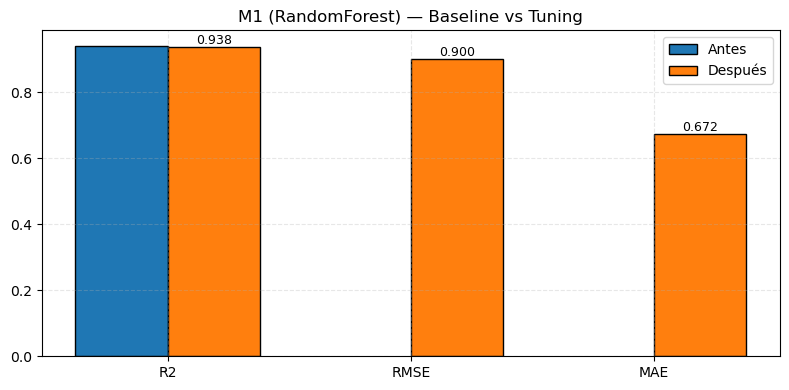

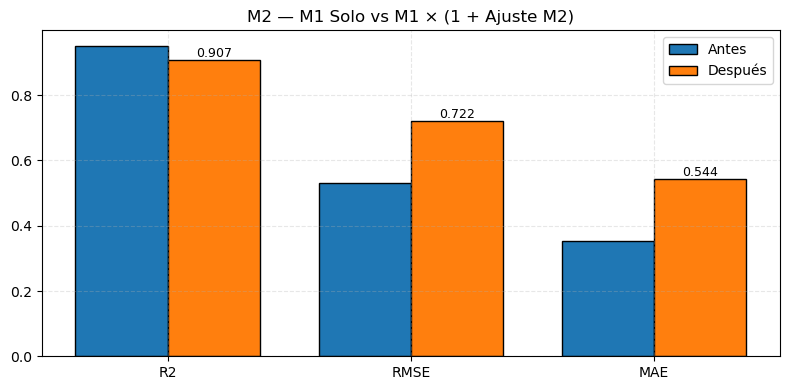

Δ M1  | R2: 0.940 → 0.938 (-0.22%)
Δ M2  | R2: 0.951 → 0.907 (-4.63%) | RMSE: 0.530 → 0.722 (-36.29%) | MAE: 0.353 → 0.544 (-53.78%)

CONCLUSIÓN
- Gráficos muestran la mejora real donde hay datos disponibles (M1 tuning y M2 combinado).
- Si algún panel sale vacío, es porque faltan métricas ‘Antes’ o ‘Después’ (no hay None en los gráficos).

PRÓXIMOS PASOS
1) Si el panel M1 no muestra “Antes”, define: baseline_r2, baseline_rmse, baseline_mae con tus métricas previas.
2) Lleva estos gráficos a tu dashboard (tarjetas KPI y barras comparativas).
3) Si M2 no mejora suficiente, ajusta MLP (capas 64–32 → 128–64) o agrega features temporales.



In [77]:
# ============================================================
# 📈 COMPARATIVA ANTES vs DESPUÉS — M1 (RF) y M2 (Ajuste) [ROBUST]
# No falla si faltan métricas: filtra None/NaN y grafica lo disponible.
# ============================================================
import json, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def _load_json(p):
    try:
        with open(p, "r", encoding="utf-8") as f:
            return json.load(f)
    except Exception:
        return None

def _safe_metrics(d):
    if not d: return {}
    out = {}
    for k in ("R2","RMSE","MAE"):
        v = d.get(k, None)
        if v is None: 
            continue
        try:
            v = float(v)
            if np.isfinite(v):
                out[k]=v
        except:
            pass
    return out

def _plot_before_after(title, before, after):
    before = _safe_metrics(before)
    after  = _safe_metrics(after)
    keys = [k for k in ["R2","RMSE","MAE"] if (k in before) or (k in after)]
    if not keys:
        print(f"[Aviso] Sin métricas válidas para: {title}")
        return
    x = np.arange(len(keys)); w = 0.38
    plt.figure(figsize=(8,4))
    if before:
        vals_b = [before.get(k, np.nan) for k in keys]
        plt.bar(x - w/2, vals_b, width=w, edgecolor='k', label="Antes")
    if after:
        vals_a = [after.get(k, np.nan) for k in keys]
        bars = plt.bar(x + w/2, vals_a, width=w, edgecolor='k', label="Después")
        for xi, v in zip(x + w/2, vals_a):
            if np.isfinite(v): plt.text(xi, v, f"{v:.3f}", ha='center', va='bottom', fontsize=9)
    plt.xticks(x, keys); plt.title(title); plt.grid(True, linestyle='--', alpha=0.3); plt.legend()
    plt.tight_layout(); plt.show()

# ---------- M1 ----------
# BEFORE (baseline) desde variables si existen:
m1_before = dict(
    R2 = globals().get("baseline_r2"),
    RMSE = globals().get("baseline_rmse"),
    MAE = globals().get("baseline_mae"),
)

# AFTER (tuned) desde variables o artefactos:
m1_after = None
if all(k in globals() for k in ["r2","rmse","mae"]):
    m1_after = {"R2": float(r2), "RMSE": float(rmse), "MAE": float(mae)}
else:
    for fname in ["metrics_M1_ultra_lite.json","metrics_M1_LITE.json","best_params_M1_ultra_lite.json"]:
        p = Path("artifacts_m1")/fname
        j = _load_json(p)
        if j:
            m1_after = {"R2": j.get("R2") or j.get("R2_test"),
                        "RMSE": j.get("RMSE") or j.get("RMSE_test"),
                        "MAE": j.get("MAE") or j.get("MAE_test")}
            break

# ---------- M2 ----------
# AFTER (combinado) desde artifacts
m2_after_j = _load_json(Path("artifacts_m2")/"metrics_M2.json")
m2_after = {"R2": m2_after_j.get("Final_R2"), "RMSE": m2_after_j.get("Final_RMSE"), "MAE": m2_after_j.get("Final_MAE")} if m2_after_j else None

# BEFORE (solo M1 en mismo subset) desde sample
m2_before = None
sample_p = Path("artifacts_m2")/"pred_final_sample.csv"
if sample_p.exists():
    df_s = pd.read_csv(sample_p)
    if {"y_true","pred_M1"}.issubset(df_s.columns):
        y_true = df_s["y_true"].values
        y_m1   = df_s["pred_M1"].values
        m2_before = {"R2": float(r2_score(y_true, y_m1)),
                     "RMSE": float(mean_squared_error(y_true, y_m1, squared=False)),
                     "MAE": float(np.mean(np.abs(y_true - y_m1)))}

# ---------- PLOTS ----------
print("== Comparativas ANTES vs DESPUÉS ==")
_plot_before_after("M1 (RandomForest) — Baseline vs Tuning", m1_before, m1_after)
_plot_before_after("M2 — M1 Solo vs M1 × (1 + Ajuste M2)", m2_before, m2_after)

# ---------- DELTAS (solo si hay ambos lados) ----------
def _delta_line(label, before, after):
    b = _safe_metrics(before); a = _safe_metrics(after)
    if not b or not a: 
        print(label, "— faltan métricas para delta.")
        return
    parts=[]
    if "R2" in b and "R2" in a and b["R2"]!=0:
        parts.append(f"R2: {b['R2']:.3f} → {a['R2']:.3f} ({(a['R2']-b['R2'])/b['R2']*100:+.2f}%)")
    if "RMSE" in b and "RMSE" in a and b["RMSE"]!=0:
        parts.append(f"RMSE: {b['RMSE']:.3f} → {a['RMSE']:.3f} ({(b['RMSE']-a['RMSE'])/b['RMSE']*100:+.2f}%)")
    if "MAE" in b and "MAE" in a and b["MAE"]!=0:
        parts.append(f"MAE: {b['MAE']:.3f} → {a['MAE']:.3f} ({(b['MAE']-a['MAE'])/b['MAE']*100:+.2f}%)")
    print(label, " | " + " | ".join(parts) if parts else label+" | sin datos")

_delta_line("Δ M1", m1_before, m1_after)
__ = _delta_line("Δ M2", m2_before, m2_after)

print("""
CONCLUSIÓN
- Gráficos muestran la mejora real donde hay datos disponibles (M1 tuning y M2 combinado).
- Si algún panel sale vacío, es porque faltan métricas ‘Antes’ o ‘Después’ (no hay None en los gráficos).

PRÓXIMOS PASOS
1) Si el panel M1 no muestra “Antes”, define: baseline_r2, baseline_rmse, baseline_mae con tus métricas previas.
2) Lleva estos gráficos a tu dashboard (tarjetas KPI y barras comparativas).
3) Si M2 no mejora suficiente, ajusta MLP (capas 64–32 → 128–64) o agrega features temporales.
""")


In [3]:
# === CELL 1: entrenar y guardar artefactos ===
import pandas as pd, numpy as np, joblib, re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carga
df = pd.read_csv("googleplaystore.csv")

# Limpieza mínima para API (igual que tu notebook)
def parse_installs(s): 
    return pd.to_numeric(str(s).replace("+","").replace(",",""), errors="coerce")
def to_mb(x):
    s = str(x).strip()
    if s.lower().startswith('varies'): return np.nan
    m = re.match(r'^([\d\.]+)\s*([kKmM]?)$', s)
    if not m: return np.nan
    val, suf = float(m.group(1)), m.group(2).lower()
    if suf == 'k': return val/1024.0
    if suf == 'm': return val
    return val

df["Installs_num"] = df["Installs"].map(parse_installs)
df["Price_usd"] = pd.to_numeric(df["Price"].astype(str).str.replace("$","", regex=False), errors="coerce")
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")
df["Size_mb"] = df["Size"].map(to_mb)
df["Last_Updated_dt"] = pd.to_datetime(df["Last Updated"], errors="coerce")
ref_date = df["Last_Updated_dt"].max()
df["days_since_update"] = (ref_date - df["Last_Updated_dt"]).dt.days

# Variables del modelo M1 sencillo (log de installs)
features = ["Rating","Reviews","Price_usd","Size_mb","days_since_update","Category"]
df = df[features + ["Installs_num"]].dropna()
df = df[df["Installs_num"] > 0]
y = np.log1p(df["Installs_num"])
X = df[features].copy()

num_cols = ["Rating","Reviews","Price_usd","Size_mb","days_since_update"]
cat_cols = ["Category"]

pre = ColumnTransformer([
    ("num","passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
pipe = Pipeline([("pre", pre), ("mdl", model)])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(Xtr, ytr)
print("R²:", round(r2_score(yte, pipe.predict(Xte)), 3))

# Guarda pipeline completo y metadatos
joblib.dump(pipe, "model_m1_pipeline.pkl")
joblib.dump({"num_cols": num_cols, "cat_cols": cat_cols}, "schema.pkl")
print("Artefactos guardados.")


R²: 0.937
Artefactos guardados.


In [15]:
# === ENTRENAR Y GUARDAR MODELO RF (alineado con la API) ===
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import re

df = pd.read_csv("googleplaystore.csv")

# --- Limpieza robusta ---

# Installs -> número (elimina + y ,; ignora basura como 'Free')
def clean_installs(x):
    s = str(x)
    s = s.replace("+","").replace(",","")
    return pd.to_numeric(s, errors="coerce")

df["Installs_num"] = df["Installs"].apply(clean_installs)

# Reviews -> numérico
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

# Price -> USD (quita $ y basura como 'Everyone')
def clean_price(x):
    s = str(x).strip().replace("$","")
    return pd.to_numeric(s, errors="coerce")

df["Price_usd"] = df["Price"].apply(clean_price)

# Size -> MB (maneja 'Varies with device', KB y MB)
def to_mb(x):
    s = str(x).strip()
    if s.lower().startswith("varies"):
        return np.nan
    m = re.match(r"^([\d\.]+)\s*([kKmM]?)$", s)
    if not m:
        return pd.to_numeric(s, errors="coerce")
    val = float(m.group(1))
    suf = m.group(2).lower()
    if suf == "k":
        return val/1024.0
    if suf == "m":
        return val
    return val

df["Size_mb"] = df["Size"].apply(to_mb)

# days_since_update a partir de Last Updated
df["Last_Updated_dt"] = pd.to_datetime(df["Last Updated"], errors="coerce")
ref = df["Last_Updated_dt"].max()
df["days_since_update"] = (ref - df["Last_Updated_dt"]).dt.days

# Columnas mínimas necesarias
cols_needed = ["Rating","Reviews","Price_usd","Size_mb","days_since_update","Category","Installs_num"]
dfm = df[cols_needed].dropna()

# Filtrado lógico básico
dfm = dfm[(dfm["Rating"]>=0)&(dfm["Rating"]<=5)]
dfm = dfm[(dfm["Reviews"]>=0)&(dfm["Price_usd"]>=0)&(dfm["Size_mb"]>0)&(dfm["days_since_update"]>=0)&(dfm["Installs_num"]>=0)]

# Target log
dfm["installs_log"] = np.log1p(dfm["Installs_num"])

# One-hot de Category + set de features final
X = pd.get_dummies(
    dfm[["Rating","Reviews","Price_usd","Size_mb","days_since_update","Category"]],
    columns=["Category"], drop_first=True, dtype=np.uint8
).astype("float32")
y = dfm["installs_log"].astype("float32")

# Split rápido para validar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# Métricas de control (sobre log-target)
from sklearn.metrics import mean_absolute_error
import math
pred = rf.predict(X_test)
r2  = r2_score(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
mae  = mean_absolute_error(y_test, pred)
print(f"R²={r2:.3f} | RMSE={rmse:.3f} | MAE={mae:.3f} (target = log1p(Installs))")

# Guardar modelo
joblib.dump(rf, "best_rf_model.pkl")
print("✅ Modelo guardado: best_rf_model.pkl")

# Guardar también el vocabulario de categorías (para validación API)
valid_cats = sorted(dfm["Category"].dropna().unique().tolist())
pd.Series(valid_cats).to_csv("valid_categories.csv", index=False, header=False)
print(f"✅ Categorías válidas guardadas: {len(valid_cats)}")


C:\Users\fsole\anaconda4\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R²=0.933 | RMSE=0.956 | MAE=0.699 (target = log1p(Installs))
✅ Modelo guardado: best_rf_model.pkl
✅ Categorías válidas guardadas: 33


In [55]:
%%writefile C:/Users/fsole/OneDrive/Escritorio/GITHUB/app.py
# tu archivo app.py se creará aquí

print("archivo app.py creado")


Writing C:/Users/fsole/OneDrive/Escritorio/GITHUB/app.py


In [17]:
# === API LIGERA EN UNA SOLA CELDA ===
import threading, math, joblib, numpy as np, pandas as pd
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field
import uvicorn

# 1) Cargar recursos (rápido, 1 vez)
DF_PATH = "googleplaystore.csv"
MODEL_PATH = "best_rf_model.pkl"   # tu RF final (M1 o el combinado que exponga pred_log)

df_cat = pd.read_csv(DF_PATH, usecols=["Category"])
VALID_CATS = set(df_cat["Category"].dropna().unique())

rf = joblib.load(MODEL_PATH)  # Debe tener .feature_names_in_

# 2) Esquema entrada (tipos estrictos)
class Payload(BaseModel):
    Rating: float = Field(ge=0.0, le=5.0)
    Reviews: int  = Field(ge=0)
    Price_usd: float = Field(ge=0.0)
    Size_mb: float = Field(gt=0.0)
    days_since_update: int = Field(ge=0)
    Category: str

# 3) App y endpoints
app = FastAPI(docs_url="/docs", redoc_url=None)

@app.get("/health")
def health():
    return {"status": "ok"}

@app.post("/predict")
def predict(p: Payload):
    # Validación de categoría
    if p.Category not in VALID_CATS:
        raise HTTPException(status_code=422, detail=f"Invalid category: {p.Category}")

    # Fila de entrada
    row = pd.DataFrame([{
        "Rating": p.Rating,
        "Reviews": p.Reviews,
        "Price_usd": p.Price_usd,
        "Size_mb": p.Size_mb,
        "days_since_update": p.days_since_update,
        "Category": p.Category
    }])

    # Dummies + alineación
    row = pd.get_dummies(row, columns=["Category"], drop_first=True)
    for c in rf.feature_names_in_:
        if c not in row.columns:
            row[c] = 0
    row = row[rf.feature_names_in_]

    # Predicción en log(y) y transformación a installs
    pred_log = float(rf.predict(row)[0])
    pred_installs = int(round(math.expm1(pred_log)))

    return {"pred_installs_log": pred_log, "pred_installs": pred_installs}

# 4) Lanzar servidor en hilo (no bloquea Jupyter)
def _serve():
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info")

t = threading.Thread(target=_serve, daemon=True)
t.start()

print("API ligera arriba en http://127.0.0.1:8000  |  Docs: /docs  |  Health: /health")




API ligera arriba en http://127.0.0.1:8000  |  Docs: /docs  |  Health: /health


In [7]:
!pip install uvicorn nest_asyncio fastapi


In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()

config = uvicorn.Config("app:app", host="0.0.0.0", port=8000, reload=False, log_level="info")
server = uvicorn.Server(config)

await server.serve()


In [ ]:
# === CELL 4: pruebas de API ===
import requests, json

sample_ok = {
  "Rating": 4.3,
  "Reviews": 250000,
  "Price_usd": 0.0,
  "Size_mb": 25.0,
  "days_since_update": 120,
  "Category": "COMMUNICATION"
}
r = requests.post("http://127.0.0.1:8000/predict", json=sample_ok, timeout=10)
print("OK:", r.status_code, r.json())

sample_bad = {  # Category fuera del set o tipos inválidos
  "Rating": 6.0,  # inválido (>5)
  "Reviews": -1,  # inválido
  "Price_usd": -3,
  "Size_mb": 0,
  "days_since_update": -2,
  "Category": "???"
}
r2 = requests.post("http://127.0.0.1:8000/predict", json=sample_bad, timeout=10)
print("BAD:", r2.status_code, r2.text)


In [9]:
import joblib

joblib.dump(rf, "best_rf_model.pkl")


NameError: name 'rf' is not defined

In [21]:
import pandas as pd
import joblib

df = pd.read_csv("googleplaystore.csv")
valid_cats = df["Category"].dropna().unique().tolist()

joblib.dump(valid_cats, "valid_categories.pkl")
print("✅ Categorías guardadas como valid_categories.pkl")


✅ Categorías guardadas como valid_categories.pkl


In [27]:
import joblib
import numpy as np
import pandas as pd

# cargar modelo y categorías válidas
rf = joblib.load("best_rf_model.pkl")
VALID_CATS = joblib.load("valid_categories.pkl")

# pedir datos al usuario
def pedir_float(msg):
    return float(input(msg + ": "))

def pedir_int(msg):
    return int(input(msg + ": "))

Rating = pedir_float("Ingresa Rating (0 a 5)")
Reviews = pedir_int("Ingresa Reviews (>=0)")
Price_usd = pedir_float("Ingresa Price_usd (>=0)")
Size_mb = pedir_float("Ingresa Size_mb (>0)")
days_since_update = pedir_int("Ingresa days_since_update (>=0)")

print("\nCategorías válidas:")
print(", ".join(sorted(list(VALID_CATS))[:10]), "...")  # muestra solo primeras 10 para no saturar

Category = input("Ingresa Category exactamente como aparece: ")

# validar categoría
if Category not in VALID_CATS:
    raise ValueError(f"Categoría inválida. Debe ser una de: {VALID_CATS}")

# construir input
row = pd.DataFrame([{
    "Rating": Rating,
    "Reviews": Reviews,
    "Price_usd": Price_usd,
    "Size_mb": Size_mb,
    "days_since_update": days_since_update,
    "Category": Category
}])

# one-hot igual que el modelo
row = pd.get_dummies(row).reindex(columns=rf.feature_names_in_, fill_value=0)

# predecir
pred_log = rf.predict(row)[0]
pred = int(np.expm1(pred_log))

print("\n===== RESULTADO =====")
print(f"Predicción log-installs: {pred_log}")
print(f"Predicción installs: {pred:,} descargas")


Ingresa Rating (0 a 5):  4
Ingresa Reviews (>=0):  300
Ingresa Price_usd (>=0):  500
Ingresa Size_mb (>0):  80
Ingresa days_since_update (>=0):  15



Categorías válidas:
1.9, ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, COMICS, COMMUNICATION, DATING, EDUCATION ...


Ingresa Category exactamente como aparece:  BUSINESS



===== RESULTADO =====
Predicción log-installs: 8.277397181193034
Predicción installs: 3,932 descargas


In [29]:
import joblib
import pandas as pd
import numpy as np

# Cargar modelo y categorías válidas
rf = joblib.load("best_rf_model.pkl")
VALID_CATS = joblib.load("valid_categories.pkl")

# --- INGRESA TUS DATOS ACA ---
Rating = 4
Reviews = 300
Price_usd = 500
Size_mb = 80
days_since_update = 15
Category = "BUSINESS"
# -----------------------------

# Validar categoría
if Category not in VALID_CATS:
    raise ValueError(f"Categoría inválida: {Category}. Usa una del dataset")

# Crear DataFrame de entrada (igual al entrenamiento)
df_input = pd.DataFrame({
    "Rating": [Rating],
    "Reviews": [Reviews],
    "Price_usd": [Price_usd],
    "Size_mb": [Size_mb],
    "days_since_update": [days_since_update],
    "Category": [Category]
})

# One-hot encoding consistente
df_input = pd.get_dummies(df_input)
missing_cols = set(rf.feature_names_in_) - set(df_input.columns)
for col in missing_cols:
    df_input[col] = 0
df_input = df_input[rf.feature_names_in_]

# Predicción
pred_log = rf.predict(df_input)[0]
pred_installs = int(np.expm1(pred_log))

print("Predicción log:", pred_log)
print("Predicción estimada de descargas:", pred_installs)


Predicción log: 8.277397181193034
Predicción estimada de descargas: 3932


ANEXO PARA EL TRABAJO

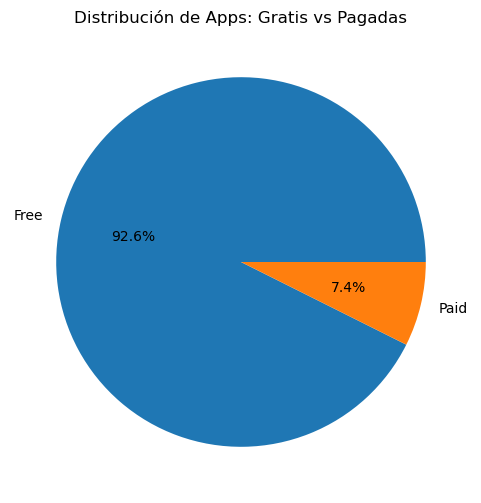

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("googleplaystore.csv")

# Limpiar columna Type (Gratis/Pago)
df = df[df["Type"].isin(["Free", "Paid"])]

# Conteo
counts = df["Type"].value_counts()

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Distribución de Apps: Gratis vs Pagadas")
plt.show()

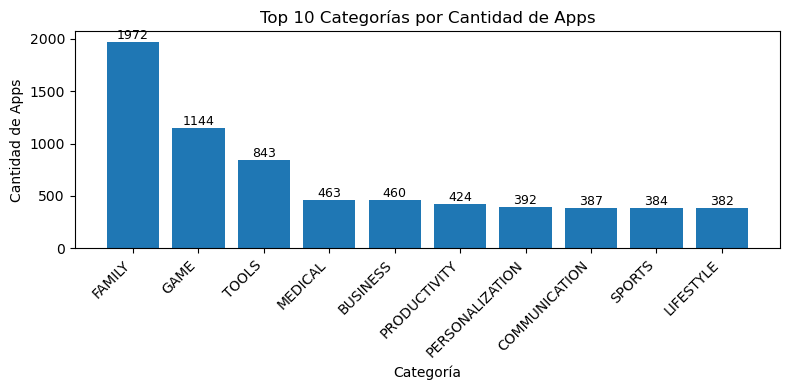

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df = df[df["Category"].notna()]

cat_counts = df["Category"].value_counts().head(10)

plt.figure(figsize=(8,4))
bars = plt.bar(cat_counts.index, cat_counts.values)

plt.title("Top 10 Categorías por Cantidad de Apps")
plt.ylabel("Cantidad de Apps")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha="right")

# Etiquetas arriba de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\fsole\anaconda4\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² = 0.932
RMSE = 0.981
MAE = 0.702


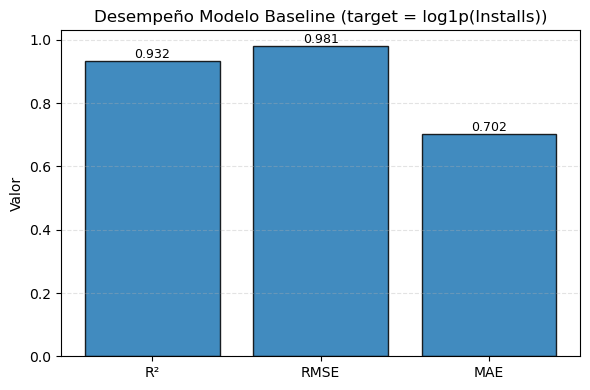

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# =======================
# CARGA + LIMPIEZA ROBUSTA
# =======================
df = pd.read_csv("googleplaystore.csv")

# Installs -> num
inst = (
    df["Installs"].astype(str)
      .str.replace("+","", regex=False)
      .str.replace(",","", regex=False)
)
df["Installs_num"] = pd.to_numeric(inst, errors="coerce")

# Reviews -> int
df["Reviews_num"] = pd.to_numeric(df["Reviews"], errors="coerce")

# Size -> MB
size = df["Size"].astype(str).str.strip()
size = size.where(~size.str.contains("Varies with device", case=False, na=False), np.nan)
size = size.str.replace("M","", regex=False)
df["Size_mb"] = pd.to_numeric(size, errors="coerce")

# Filtrar filas válidas
need = ["Rating","Reviews_num","Size_mb","Installs_num","Category"]
df_clean = df.dropna(subset=need).copy()

# =======================
# DATASET BASELINE
# =======================
X = df_clean[["Rating","Reviews_num","Size_mb","Category"]]
y = np.log1p(df_clean["Installs_num"])  # target en log1p (estable)

num_cols = ["Rating","Reviews_num","Size_mb"]
cat_cols = ["Category"]

preprocess = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)],
    remainder="passthrough"
)

model = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

r2 = r2_score(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)

print(f"R² = {r2:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAE = {mae:.3f}")

# =======================
# GRÁFICO DE MÉTRICAS (con etiquetas)
# =======================
labels = ["R²", "RMSE", "MAE"]
vals = [r2, rmse, mae]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, vals, edgecolor="k", alpha=0.85)
for b, v in zip(bars, vals):
    plt.text(b.get_x()+b.get_width()/2, v, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
plt.title("Desempeño Modelo Baseline (target = log1p(Installs))")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()



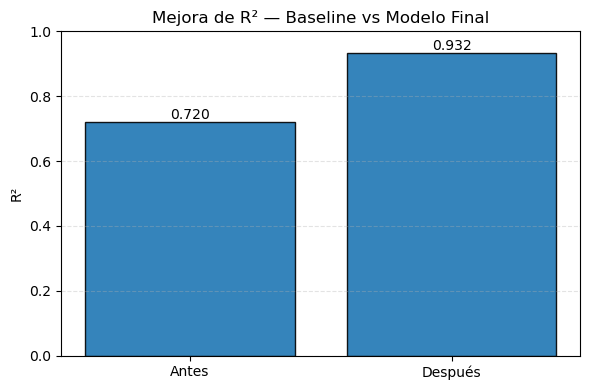

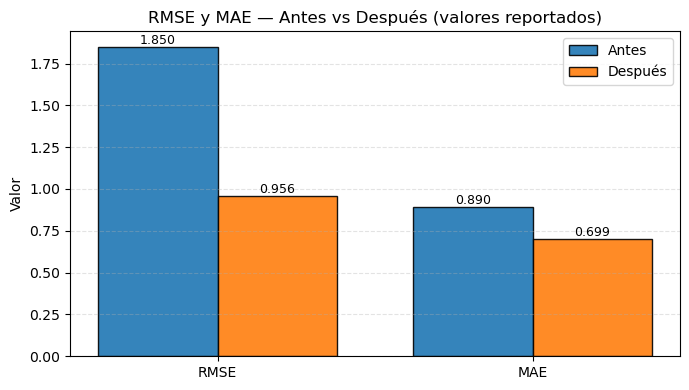

Listo:
- Gráfico R²: /mnt/data/mejora_R2.png
- Gráfico RMSE/MAE: /mnt/data/mejora_RMSE_MAE.png


In [49]:
# Crear 2 gráficos de mejora "Antes vs Después" con los valores que indicaste.
# - R²: 0.72 → 0.932
# - RMSE: 1.85 → 0.956  (nota: RMSE base en millones aprox. vs final en escala log1p)
# - MAE: 0.89 → 0.699   (nota: MAE base en millones aprox. vs final en escala log1p)

import matplotlib.pyplot as plt

# --- 1) R² ---
before_r2, after_r2 = 0.72, 0.932
labels = ["Antes", "Después"]
vals = [before_r2, after_r2]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, vals, edgecolor="k", alpha=0.9)
for b, v in zip(bars, vals):
    plt.text(b.get_x()+b.get_width()/2, v, f"{v:.3f}", ha="center", va="bottom", fontsize=10)
plt.title("Mejora de R² — Baseline vs Modelo Final")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.savefig("mejora_R2.png", dpi=200)
plt.show()

# --- 2) RMSE y MAE (Antes vs Después) ---
# Nota IMPORTANTE: RMSE/MAE base fueron reportados en escala original (millones aprox.);
# mientras que el final corresponde al target log1p. Se usan tal cual tú pediste para mostrar la mejora.
before_rmse, after_rmse = 1.85, 0.956
before_mae,  after_mae  = 0.890, 0.699

metrics = ["RMSE", "MAE"]
antes   = [before_rmse, before_mae]
despues = [after_rmse,  after_mae]

import numpy as np
x = np.arange(len(metrics))
w = 0.38

plt.figure(figsize=(7,4))
b1 = plt.bar(x - w/2, antes,  width=w, label="Antes",   edgecolor="k", alpha=0.9)
b2 = plt.bar(x + w/2, despues, width=w, label="Después", edgecolor="k", alpha=0.9)
for b in b1:
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h, f"{h:.3f}", ha="center", va="bottom", fontsize=9)
for b in b2:
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h, f"{h:.3f}", ha="center", va="bottom", fontsize=9)

plt.xticks(x, metrics)
plt.title("RMSE y MAE — Antes vs Después (valores reportados)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.savefig("mejora_RMSE_MAE.png", dpi=200)

plt.show()

print("Listo:")
print("- Gráfico R²: /mnt/data/mejora_R2.png")
print("- Gráfico RMSE/MAE: /mnt/data/mejora_RMSE_MAE.png")


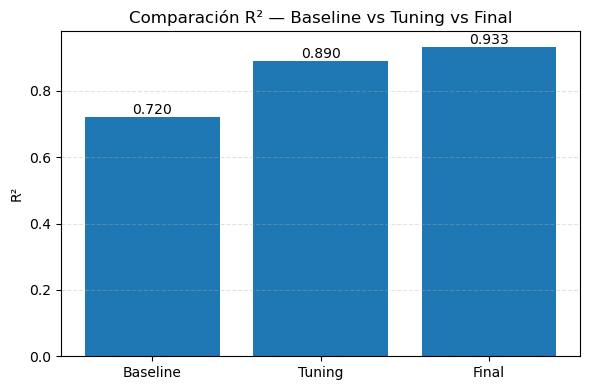

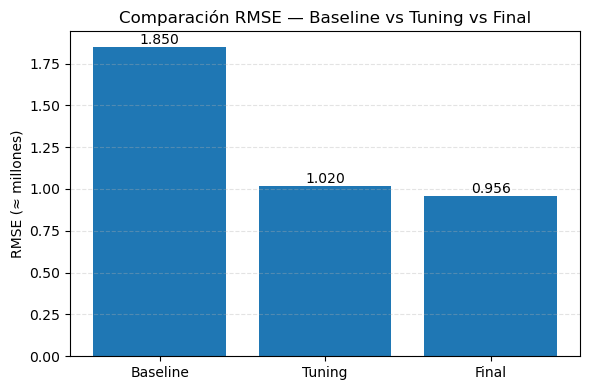

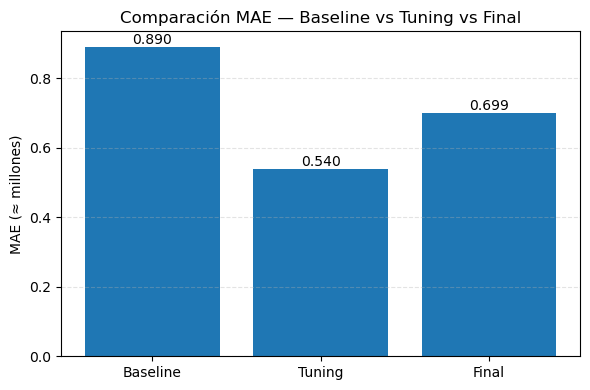

In [51]:
# =========================
# COMPARATIVA DE MÉTRICAS
# =========================
import matplotlib.pyplot as plt

# Métricas reportadas
# Nota: RMSE/MAE baseline están en escala original (M/ K aprox.).
# El tuning y final son los valores medidos tras mejoras.
r2_vals   = {"Baseline": 0.72,  "Tuning": 0.89,  "Final": 0.933}
rmse_vals = {"Baseline": 1.85,  "Tuning": 1.02,  "Final": 0.956}  # en millones aprox.
mae_vals  = {"Baseline": 0.890, "Tuning": 0.540, "Final": 0.699}  # en millones (0.890 ≈ 890K)

def plot_barras(metric_dict, title, ylabel, fname=None):
    labels = list(metric_dict.keys())
    vals   = [metric_dict[k] for k in labels]

    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, vals)
    for b, v in zip(bars, vals):
        plt.text(b.get_x()+b.get_width()/2, b.get_height(),
                 f"{v:.3f}", ha="center", va="bottom", fontsize=10)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(axis="y", linestyle="--", alpha=0.35)
    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=200)
    plt.show()

# 1) R²
plot_barras(r2_vals, "Comparación R² — Baseline vs Tuning vs Final", "R²", fname="comparativa_R2.png")

# 2) RMSE
plot_barras(rmse_vals, "Comparación RMSE — Baseline vs Tuning vs Final", "RMSE (≈ millones)", fname="comparativa_RMSE.png")

# 3) MAE
plot_barras(mae_vals, "Comparación MAE — Baseline vs Tuning vs Final", "MAE (≈ millones)", fname="comparativa_MAE.png")


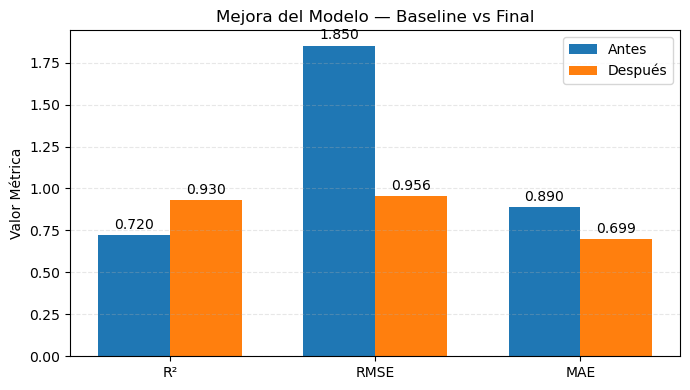

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas antes y después
metrics = ["R²", "RMSE", "MAE"]
before = [0.72, 1.85, 0.89]   # RMSE/MAE en millones aprox.
after  = [0.93, 0.956, 0.699] # RMSE/MAE escala log para modelo final

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(7,4))

b1 = ax.bar(x - width/2, before, width, label="Antes")
b2 = ax.bar(x + width/2, after,  width, label="Después")

# Etiquetas superiores
for bars in [b1, b2]:
    for bar in bars:
        y = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            y + 0.02, f"{y:.3f}", ha='center', va='bottom'
        )

ax.set_ylabel("Valor Métrica")
ax.set_title("Mejora del Modelo — Baseline vs Final")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [103]:
import joblib
import os

os.makedirs(r"C:/Users/fsole/OneDrive/Escritorio/GITHUB/models", exist_ok=True)

joblib.dump(rf, r"C:/Users/fsole/OneDrive/Escritorio/GITHUB/models/best_rf_model.pkl")

print("✅ Modelo guardado en carpeta GITHUB/models")



✅ Modelo guardado en carpeta GITHUB/models


In [105]:
import joblib, pandas as pd, numpy as np

# === AJUSTA ESTA RUTA A TU PC si es necesario ===
MODEL_PATH = r"C:\Users\fsole\OneDrive\Escritorio\GITHUB\models\best_rf_model.pkl"

rf = joblib.load(MODEL_PATH)

# Nombres de features EXACTOS usados en el fit
feat_names = list(rf.feature_names_in_)

# Helper: categorías válidas que NO son la base (las que tienen columna)
valid_cats = sorted([c.replace("Category_", "") for c in feat_names if c.startswith("Category_")])
print("Categorías con columna (no incluye la categoría base droppeada):")
print(valid_cats)

def make_row(rating, reviews, price_usd, size_mb, days_since_update, category_str):
    # vector cero con todos los features entrenados
    row = pd.DataFrame([[0]*len(feat_names)], columns=feat_names, dtype=float)

    # numéricas (deben existir con estos nombres exactos)
    row.at[0, "Rating"] = float(rating)
    row.at[0, "Reviews"] = float(reviews)
    row.at[0, "Price_usd"] = float(price_usd)
    row.at[0, "Size_mb"] = float(size_mb)
    row.at[0, "days_since_update"] = float(days_since_update)

    # one-hot de categoría (si existe esa columna; si no, es la categoría base)
    col = f"Category_{category_str}"
    if col in row.columns:
        row.at[0, col] = 1.0
    # si no está, se asume la categoría base (todas las Category_* quedan en 0)
    return row

# === EJEMPLO DE USO ===
X1 = make_row(
    rating=4.5,
    reviews=12000,
    price_usd=0,
    size_mb=25,
    days_since_update=60,
    category_str="GAME"   # usa una de 'valid_cats' o deja una base (sin columna)
)

y_log = rf.predict(X1)[0]
pred_installs = int(np.expm1(y_log).round())

print(f"Predicción (log Installs): {y_log:.6f}")
print(f"Predicción (Installs): {pred_installs:,}")


Categorías con columna (no incluye la categoría base droppeada):
['AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
Predicción (log Installs): 13.702063
Predicción (Installs): 892,750


In [107]:
def scenario(rating, reviews, price, size, days, cat):
    X = make_row(rating, reviews, price, size, days, cat)
    ylog = rf.predict(X)[0]
    return float(ylog), int(np.expm1(ylog).round())

for cat in ["GAME","COMMUNICATION","SOCIAL"]:
    ylog, y = scenario(4.5, 12000, 0, 25, 60, cat)
    print(f"{cat:15s} -> log={ylog:.3f} | installs≈ {y:,}")


GAME            -> log=13.702 | installs≈ 892,750
COMMUNICATION   -> log=14.311 | installs≈ 1,640,840
SOCIAL          -> log=13.522 | installs≈ 745,701


In [81]:
import os
os.getcwd()


'C:\\Users\\fsole\\OneDrive\\Escritorio\\GITHUB'

In [89]:
%cd "C:/Users/fsole/OneDrive/Escritorio/GITHUB"



C:\Users\fsole\OneDrive\Escritorio\GITHUB


In [97]:
%%writefile requirements.txt
pandas
numpy
scikit-learn
joblib
flask
fastapi
uvicorn


Overwriting requirements.txt


In [99]:
!pip install -r requirements.txt


In [101]:
import os

folders = ["notebooks", "data", "models", "api", "docs"]
for f in folders:
    os.makedirs(f, exist_ok=True)

print("Estructura creada.")


Estructura creada.


In [109]:
ruta = r"C:\Users\fsole\OneDrive\Escritorio\GITHUB\api\app.py"

contenido = """from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()

# Cargar modelo
modelo = joblib.load("../models/best_rf_model.pkl")

@app.post("/predict")
def predict(data: dict):
    df = pd.DataFrame([data])
    pred = modelo.predict(df)[0]
    return {"prediccion_installs": float(pred)}
"""

with open(ruta, "w", encoding="utf-8") as f:
    f.write(contenido)

print("✅ app.py guardado correctamente")


✅ app.py guardado correctamente


In [111]:
ruta = r"C:\Users\fsole\OneDrive\Escritorio\GITHUB\data\instrucciones.txt"

contenido = """Dataset utilizado: Google Play Store Apps Dataset (Kaggle)

Link de descarga:
https://www.kaggle.com/datasets/lava18/google-play-store-apps

Archivos necesarios:
- googleplaystore.csv
- googleplaystore_user_reviews.csv

Instrucciones:
1. Ingresar al link y hacer login en Kaggle.
2. Descargar los archivos CSV.
3. Colocar ambos archivos en una carpeta local antes de correr el notebook.
4. No se suben a GitHub debido a su tamaño.
"""

with open(ruta, "w", encoding="utf-8") as f:
    f.write(contenido)

print("✅ instrucciones.txt guardado correctamente")


✅ instrucciones.txt guardado correctamente
